In [1]:
# python
from tqdm.notebook import tqdm
import sys
import os
import importlib
# columnar analysis
import awkward as ak
import mplhep as hep
import numpy as np
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
# local
sys.path.insert(1, os.path.join(sys.path[0], '../..')) # fixme: there must be a better way to handle this...
from sidm.tools import sidm_processor, utilities
# always reload local modules to pick up changes during development
importlib.reload(sidm_processor)
importlib.reload(utilities)
# plotting
import matplotlib.pyplot as plt
utilities.set_plot_style()
%matplotlib inline

In [2]:
def structure(vari, cha1, cha2):
    print("4mu {0} structure: {1}".format(vari, cha1))
    print("2mu2e {0} structure: {1}".format(vari, cha2))
    
    return vari

In [3]:
samples_2mu2e = [
    '2mu2e_500GeV_5GeV_0p08mm',
    '2mu2e_500GeV_5GeV_0p8mm',
    '2mu2e_500GeV_5GeV_8p0mm',
    '2mu2e_500GeV_5GeV_40p0mm',
    '2mu2e_500GeV_5GeV_80p0mm',
]

samples_4mu = [
    '4mu_500GeV_5GeV_0p08mm',
    '4mu_500GeV_5GeV_0p8mm',
    '4mu_500GeV_5GeV_8p0mm',
    '4mu_500GeV_5GeV_40p0mm',
    '4mu_500GeV_5GeV_80p0mm',
]

In [4]:
fileset_4mu = utilities.make_fileset(samples_4mu, "llpNanoAOD_v1_merged")
fileset_2mu2e = utilities.make_fileset(samples_2mu2e, "llpNanoAOD_v1_merged")

events_2mu2e, events_4mu = {}, {}

for i in tqdm(samples_2mu2e):
    fname = fileset_2mu2e[i][0]
    print(fname)
    events_2mu2e[i] = NanoEventsFactory.from_root(
        fname,
        schemaclass=NanoAODSchema,
    ).events().Muon
    
for i in tqdm(samples_4mu):
    fname = fileset_4mu[i][0]
    print(fname)
    events_4mu[i] = NanoEventsFactory.from_root(
        fname,
        schemaclass=NanoAODSchema,
    ).events().Muon

  0%|          | 0/5 [00:00<?, ?it/s]

root://xcache//store/user/dlee3/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p08.root
root://xcache//store/user/dlee3/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p8.root
root://xcache//store/user/dlee3/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-8p0.root
root://xcache//store/user/dlee3/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-40p0.root
root://xcache//store/user/dlee3/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-80p0.root


  0%|          | 0/5 [00:00<?, ?it/s]

root://xcache//store/user/dlee3/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-0p08.root
root://xcache//store/user/dlee3/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-0p8.root
root://xcache//store/user/dlee3/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-8p0.root
root://xcache//store/user/dlee3/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-40p0.root
root://xcache//store/user/dlee3/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-80p0.root


In [5]:
import hist
from hist import Hist

In [6]:
h1 = Hist(
    hist.axis.Regular(50, 0, 0.2, name="dxyErr", label="PF Muon dxyErr [cm]", flow=False),
    hist.axis.Regular(50, 0, 50, name="trkNumHits", label="PF Muon trkNumHits", flow=False),
)
s1_data = ak.flatten(events_2mu2e['2mu2e_500GeV_5GeV_0p08mm'].dxyErr)
w1_data = ak.flatten(events_2mu2e['2mu2e_500GeV_5GeV_0p08mm'].trkNumHits)

h1.fill(s1_data, w1_data)

h2 = Hist(
    hist.axis.Regular(50, 0, 0.2, name="dxyErr", label="PF Muon dxyErr [cm]", flow=False),
    hist.axis.Regular(50, 0, 50, name="trkNumHits", label="PF Muon trkNumHits", flow=False),
)
s2_data = ak.flatten(events_2mu2e['2mu2e_500GeV_5GeV_0p8mm'].dxyErr)
w2_data = ak.flatten(events_2mu2e['2mu2e_500GeV_5GeV_0p8mm'].trkNumHits)

h2.fill(s2_data, w2_data)

h3 = Hist(
    hist.axis.Regular(50, 0, 0.2, name="dxyErr", label="PF Muon dxyErr [cm]", flow=False),
    hist.axis.Regular(50, 0, 50, name="trkNumHits", label="PF Muon trkNumHits", flow=False),
)
s3_data = ak.flatten(events_2mu2e['2mu2e_500GeV_5GeV_8p0mm'].dxyErr)
w3_data = ak.flatten(events_2mu2e['2mu2e_500GeV_5GeV_8p0mm'].trkNumHits)

h3.fill(s3_data, w3_data)

h4 = Hist(
    hist.axis.Regular(50, 0, 0.2, name="dxyErr", label="PF Muon dxyErr [cm]", flow=False),
    hist.axis.Regular(50, 0, 50, name="trkNumHits", label="PF Muon trkNumHits", flow=False),
)
s4_data = ak.flatten(events_2mu2e['2mu2e_500GeV_5GeV_40p0mm'].dxyErr)
w4_data = ak.flatten(events_2mu2e['2mu2e_500GeV_5GeV_40p0mm'].trkNumHits)

h4.fill(s4_data, w4_data)

h5 = Hist(
    hist.axis.Regular(50, 0, 0.2, name="dxyErr", label="PF Muon dxyErr [cm]", flow=False),
    hist.axis.Regular(50, 0, 50, name="trkNumHits", label="PF Muon trkNumHits", flow=False),
)
s5_data = ak.flatten(events_2mu2e['2mu2e_500GeV_5GeV_80p0mm'].dxyErr)
w5_data = ak.flatten(events_2mu2e['2mu2e_500GeV_5GeV_80p0mm'].trkNumHits)

h5.fill(s5_data, w5_data)

Hist(
  Regular(50, 0, 0.2, underflow=False, overflow=False, name='dxyErr', label='PF Muon dxyErr [cm]'),
  Regular(50, 0, 50, underflow=False, overflow=False, name='trkNumHits', label='PF Muon trkNumHits'),
  storage=Double()) # Sum: 113958.0

  Regular(50, 0, 0.2, underflow=False, overflow=False, name='dxyErr', label='PF Muon dxyErr [cm]'),
  Regular(50, 0, 50, underflow=False, overflow=False, name='trkNumHits', label='PF Muon trkNumHits'),
  storage=Double()) # Sum: 374579.0
  Regular(50, 0, 0.2, underflow=False, overflow=False, name='dxyErr', label='PF Muon dxyErr [cm]'),
  Regular(50, 0, 50, underflow=False, overflow=False, name='trkNumHits', label='PF Muon trkNumHits'),
  storage=Double()) # Sum: 165284.0
  Regular(50, 0, 0.2, underflow=False, overflow=False, name='dxyErr', label='PF Muon dxyErr [cm]'),
  Regular(50, 0, 50, underflow=False, overflow=False, name='trkNumHits', label='PF Muon trkNumHits'),
  storage=Double()) # Sum: 178626.0
  Regular(50, 0, 0.2, underflow=False, overflow=False, name='dxyErr', label='PF Muon dxyErr [cm]'),
  Regular(50, 0, 50, underflow=False, overflow=False, name='trkNumHits', label='PF Muon trkNumHits'),
  storage=Double()) # Sum: 140922.0
  Regular(50, 0, 0.2, underflow=False, overflow=

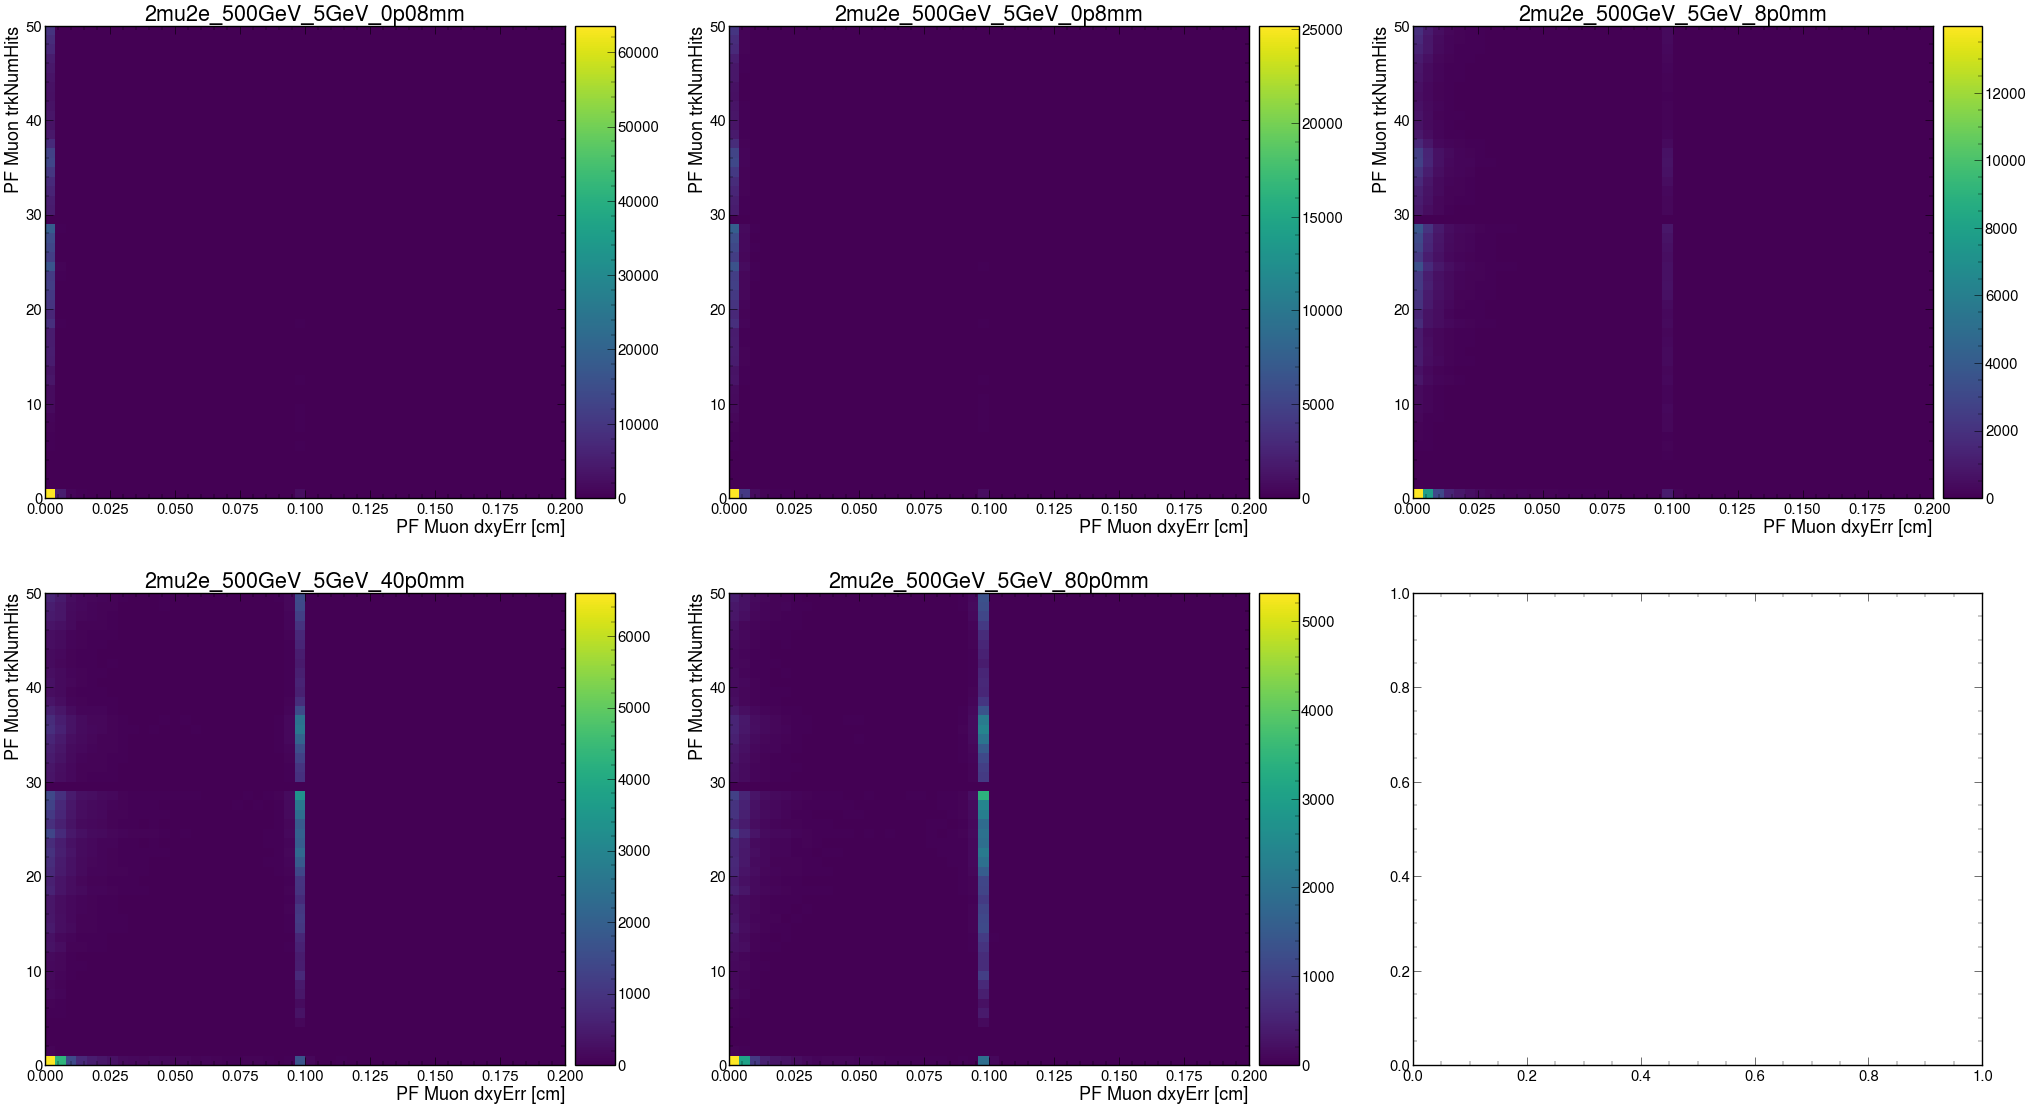

<Figure size 500x500 with 0 Axes>

In [7]:
fig, axs = plt.subplots(2, 3, figsize=(50, 27))

hep.hist2dplot(h1, ax=axs[0][0])
plt.title('2mu2e_500GeV_5GeV_0p08mm')
hep.hist2dplot(h2, ax=axs[0][1])
plt.title('2mu2e_500GeV_5GeV_0p8mm')
hep.hist2dplot(h3, ax=axs[0][2])
plt.title('2mu2e_500GeV_5GeV_8p0mm')
hep.hist2dplot(h4, ax=axs[1][0])
plt.title('2mu2e_500GeV_5GeV_40p0mm')
hep.hist2dplot(h5, ax=axs[1][1])
plt.title('2mu2e_500GeV_5GeV_80p0mm')

plt.show()
plt.savefig("../Plots/Test/2D/dxyErr_trkNumHits_2mu2e.png", bbox_inches="tight")

In [8]:
h1 = Hist(
    hist.axis.Regular(50, 0, 0.2, name="dxyErr", label="PF Muon dxyErr [cm]", flow=False),
    hist.axis.Regular(50, 0, 50, name="trkNumHits", label="PF Muon trkNumHits", flow=False),
)
s1_data = ak.flatten(events_4mu['4mu_500GeV_5GeV_0p08mm'].dxyErr)
w1_data = ak.flatten(events_4mu['4mu_500GeV_5GeV_0p08mm'].trkNumHits)

h1.fill(s1_data, w1_data)

h2 = Hist(
    hist.axis.Regular(50, 0, 0.2, name="dxyErr", label="PF Muon dxyErr [cm]", flow=False),
    hist.axis.Regular(50, 0, 50, name="trkNumHits", label="PF Muon trkNumHits", flow=False),
)
s2_data = ak.flatten(events_4mu['4mu_500GeV_5GeV_0p8mm'].dxyErr)
w2_data = ak.flatten(events_4mu['4mu_500GeV_5GeV_0p8mm'].trkNumHits)

h2.fill(s2_data, w2_data)

h3 = Hist(
    hist.axis.Regular(50, 0, 0.2, name="dxyErr", label="PF Muon dxyErr [cm]", flow=False),
    hist.axis.Regular(50, 0, 50, name="trkNumHits", label="PF Muon trkNumHits", flow=False),
)
s3_data = ak.flatten(events_4mu['4mu_500GeV_5GeV_8p0mm'].dxyErr)
w3_data = ak.flatten(events_4mu['4mu_500GeV_5GeV_8p0mm'].trkNumHits)

h3.fill(s3_data, w3_data)

h4 = Hist(
    hist.axis.Regular(50, 0, 0.2, name="dxyErr", label="PF Muon dxyErr [cm]", flow=False),
    hist.axis.Regular(50, 0, 50, name="trkNumHits", label="PF Muon trkNumHits", flow=False),
)
s4_data = ak.flatten(events_4mu['4mu_500GeV_5GeV_40p0mm'].dxyErr)
w4_data = ak.flatten(events_4mu['4mu_500GeV_5GeV_40p0mm'].trkNumHits)

h4.fill(s4_data, w4_data)

h5 = Hist(
    hist.axis.Regular(50, 0, 0.2, name="dxyErr", label="PF Muon dxyErr [cm]", flow=False),
    hist.axis.Regular(50, 0, 50, name="trkNumHits", label="PF Muon trkNumHits", flow=False),
)
s5_data = ak.flatten(events_4mu['4mu_500GeV_5GeV_80p0mm'].dxyErr)
w5_data = ak.flatten(events_4mu['4mu_500GeV_5GeV_80p0mm'].trkNumHits)

h5.fill(s5_data, w5_data)

Hist(
  Regular(50, 0, 0.2, underflow=False, overflow=False, name='dxyErr', label='PF Muon dxyErr [cm]'),
  Regular(50, 0, 50, underflow=False, overflow=False, name='trkNumHits', label='PF Muon trkNumHits'),
  storage=Double()) # Sum: 190810.0

  Regular(50, 0, 0.2, underflow=False, overflow=False, name='dxyErr', label='PF Muon dxyErr [cm]'),
  Regular(50, 0, 50, underflow=False, overflow=False, name='trkNumHits', label='PF Muon trkNumHits'),
  storage=Double()) # Sum: 444546.0
  Regular(50, 0, 0.2, underflow=False, overflow=False, name='dxyErr', label='PF Muon dxyErr [cm]'),
  Regular(50, 0, 50, underflow=False, overflow=False, name='trkNumHits', label='PF Muon trkNumHits'),
  storage=Double()) # Sum: 504591.0
  Regular(50, 0, 0.2, underflow=False, overflow=False, name='dxyErr', label='PF Muon dxyErr [cm]'),
  Regular(50, 0, 50, underflow=False, overflow=False, name='trkNumHits', label='PF Muon trkNumHits'),
  storage=Double()) # Sum: 486613.0
  Regular(50, 0, 0.2, underflow=False, overflow=False, name='dxyErr', label='PF Muon dxyErr [cm]'),
  Regular(50, 0, 50, underflow=False, overflow=False, name='trkNumHits', label='PF Muon trkNumHits'),
  storage=Double()) # Sum: 356344.0
  Regular(50, 0, 0.2, underflow=False, overflow=

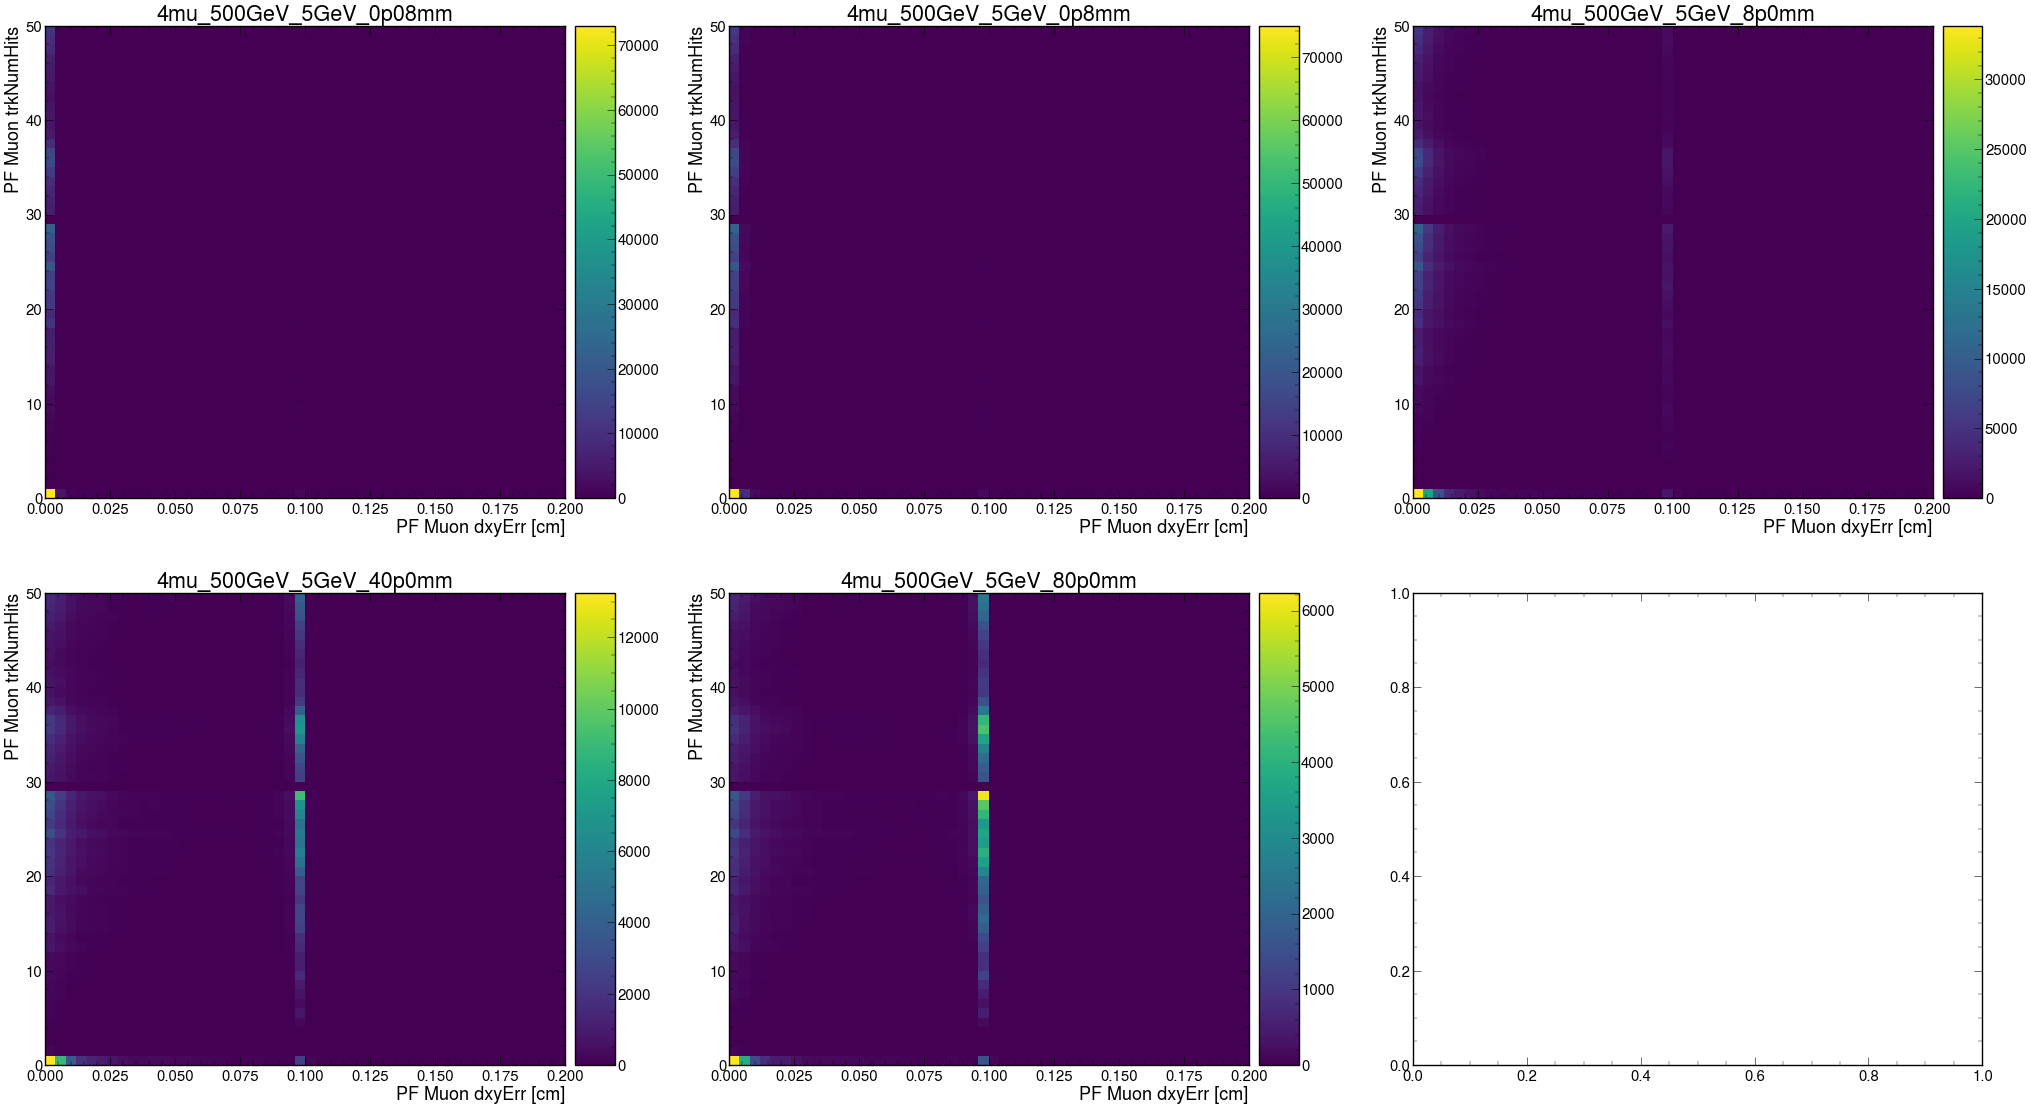

<Figure size 500x500 with 0 Axes>

In [9]:
fig, axs = plt.subplots(2, 3, figsize=(50, 27))

hep.hist2dplot(h1, ax=axs[0][0])
plt.title('4mu_500GeV_5GeV_0p08mm')
hep.hist2dplot(h2, ax=axs[0][1])
plt.title('4mu_500GeV_5GeV_0p8mm')
hep.hist2dplot(h3, ax=axs[0][2])
plt.title('4mu_500GeV_5GeV_8p0mm')
hep.hist2dplot(h4, ax=axs[1][0])
plt.title('4mu_500GeV_5GeV_40p0mm')
hep.hist2dplot(h5, ax=axs[1][1])
plt.title('4mu_500GeV_5GeV_80p0mm')

plt.show()
plt.savefig("../Plots/Test/2D/dxyErr_trkNumHits_4mu.png", bbox_inches="tight")

In [10]:
h1 = Hist(
    hist.axis.Regular(50, 0, 10, name="dzErr", label="PF Muon dzErr [cm]", flow=False),
    hist.axis.Regular(50, 0, 50, name="trkNumHits", label="PF Muon trkNumHits", flow=False),
)
s1_data = ak.flatten(events_2mu2e['2mu2e_500GeV_5GeV_0p08mm'].dzErr)
w1_data = ak.flatten(events_2mu2e['2mu2e_500GeV_5GeV_0p08mm'].trkNumHits)

h1.fill(s1_data, w1_data)

h2 = Hist(
    hist.axis.Regular(50, 0, 10, name="dzErr", label="PF Muon dzErr [cm]", flow=False),
    hist.axis.Regular(50, 0, 50, name="trkNumHits", label="PF Muon trkNumHits", flow=False),
)
s2_data = ak.flatten(events_2mu2e['2mu2e_500GeV_5GeV_0p8mm'].dzErr)
w2_data = ak.flatten(events_2mu2e['2mu2e_500GeV_5GeV_0p8mm'].trkNumHits)

h2.fill(s2_data, w2_data)

h3 = Hist(
    hist.axis.Regular(50, 0, 10, name="dzErr", label="PF Muon dzErr [cm]", flow=False),
    hist.axis.Regular(50, 0, 50, name="trkNumHits", label="PF Muon trkNumHits", flow=False),
)
s3_data = ak.flatten(events_2mu2e['2mu2e_500GeV_5GeV_8p0mm'].dzErr)
w3_data = ak.flatten(events_2mu2e['2mu2e_500GeV_5GeV_8p0mm'].trkNumHits)

h3.fill(s3_data, w3_data)

h4 = Hist(
    hist.axis.Regular(50, 0, 10, name="dzErr", label="PF Muon dzErr [cm]", flow=False),
    hist.axis.Regular(50, 0, 50, name="trkNumHits", label="PF Muon trkNumHits", flow=False),
)
s4_data = ak.flatten(events_2mu2e['2mu2e_500GeV_5GeV_40p0mm'].dzErr)
w4_data = ak.flatten(events_2mu2e['2mu2e_500GeV_5GeV_40p0mm'].trkNumHits)

h4.fill(s4_data, w4_data)

h5 = Hist(
    hist.axis.Regular(50, 0, 10, name="dzErr", label="PF Muon dzErr [cm]", flow=False),
    hist.axis.Regular(50, 0, 50, name="trkNumHits", label="PF Muon trkNumHits", flow=False),
)
s5_data = ak.flatten(events_2mu2e['2mu2e_500GeV_5GeV_80p0mm'].dzErr)
w5_data = ak.flatten(events_2mu2e['2mu2e_500GeV_5GeV_80p0mm'].trkNumHits)

h5.fill(s5_data, w5_data)

Hist(
  Regular(50, 0, 10, underflow=False, overflow=False, name='dzErr', label='PF Muon dzErr [cm]'),
  Regular(50, 0, 50, underflow=False, overflow=False, name='trkNumHits', label='PF Muon trkNumHits'),
  storage=Double()) # Sum: 113878.0

  Regular(50, 0, 10, underflow=False, overflow=False, name='dzErr', label='PF Muon dzErr [cm]'),
  Regular(50, 0, 50, underflow=False, overflow=False, name='trkNumHits', label='PF Muon trkNumHits'),
  storage=Double()) # Sum: 374582.0
  Regular(50, 0, 10, underflow=False, overflow=False, name='dzErr', label='PF Muon dzErr [cm]'),
  Regular(50, 0, 50, underflow=False, overflow=False, name='trkNumHits', label='PF Muon trkNumHits'),
  storage=Double()) # Sum: 165279.0
  Regular(50, 0, 10, underflow=False, overflow=False, name='dzErr', label='PF Muon dzErr [cm]'),
  Regular(50, 0, 50, underflow=False, overflow=False, name='trkNumHits', label='PF Muon trkNumHits'),
  storage=Double()) # Sum: 178421.0
  Regular(50, 0, 10, underflow=False, overflow=False, name='dzErr', label='PF Muon dzErr [cm]'),
  Regular(50, 0, 50, underflow=False, overflow=False, name='trkNumHits', label='PF Muon trkNumHits'),
  storage=Double()) # Sum: 140764.0
  Regular(50, 0, 10, underflow=False, overflow=False, name='

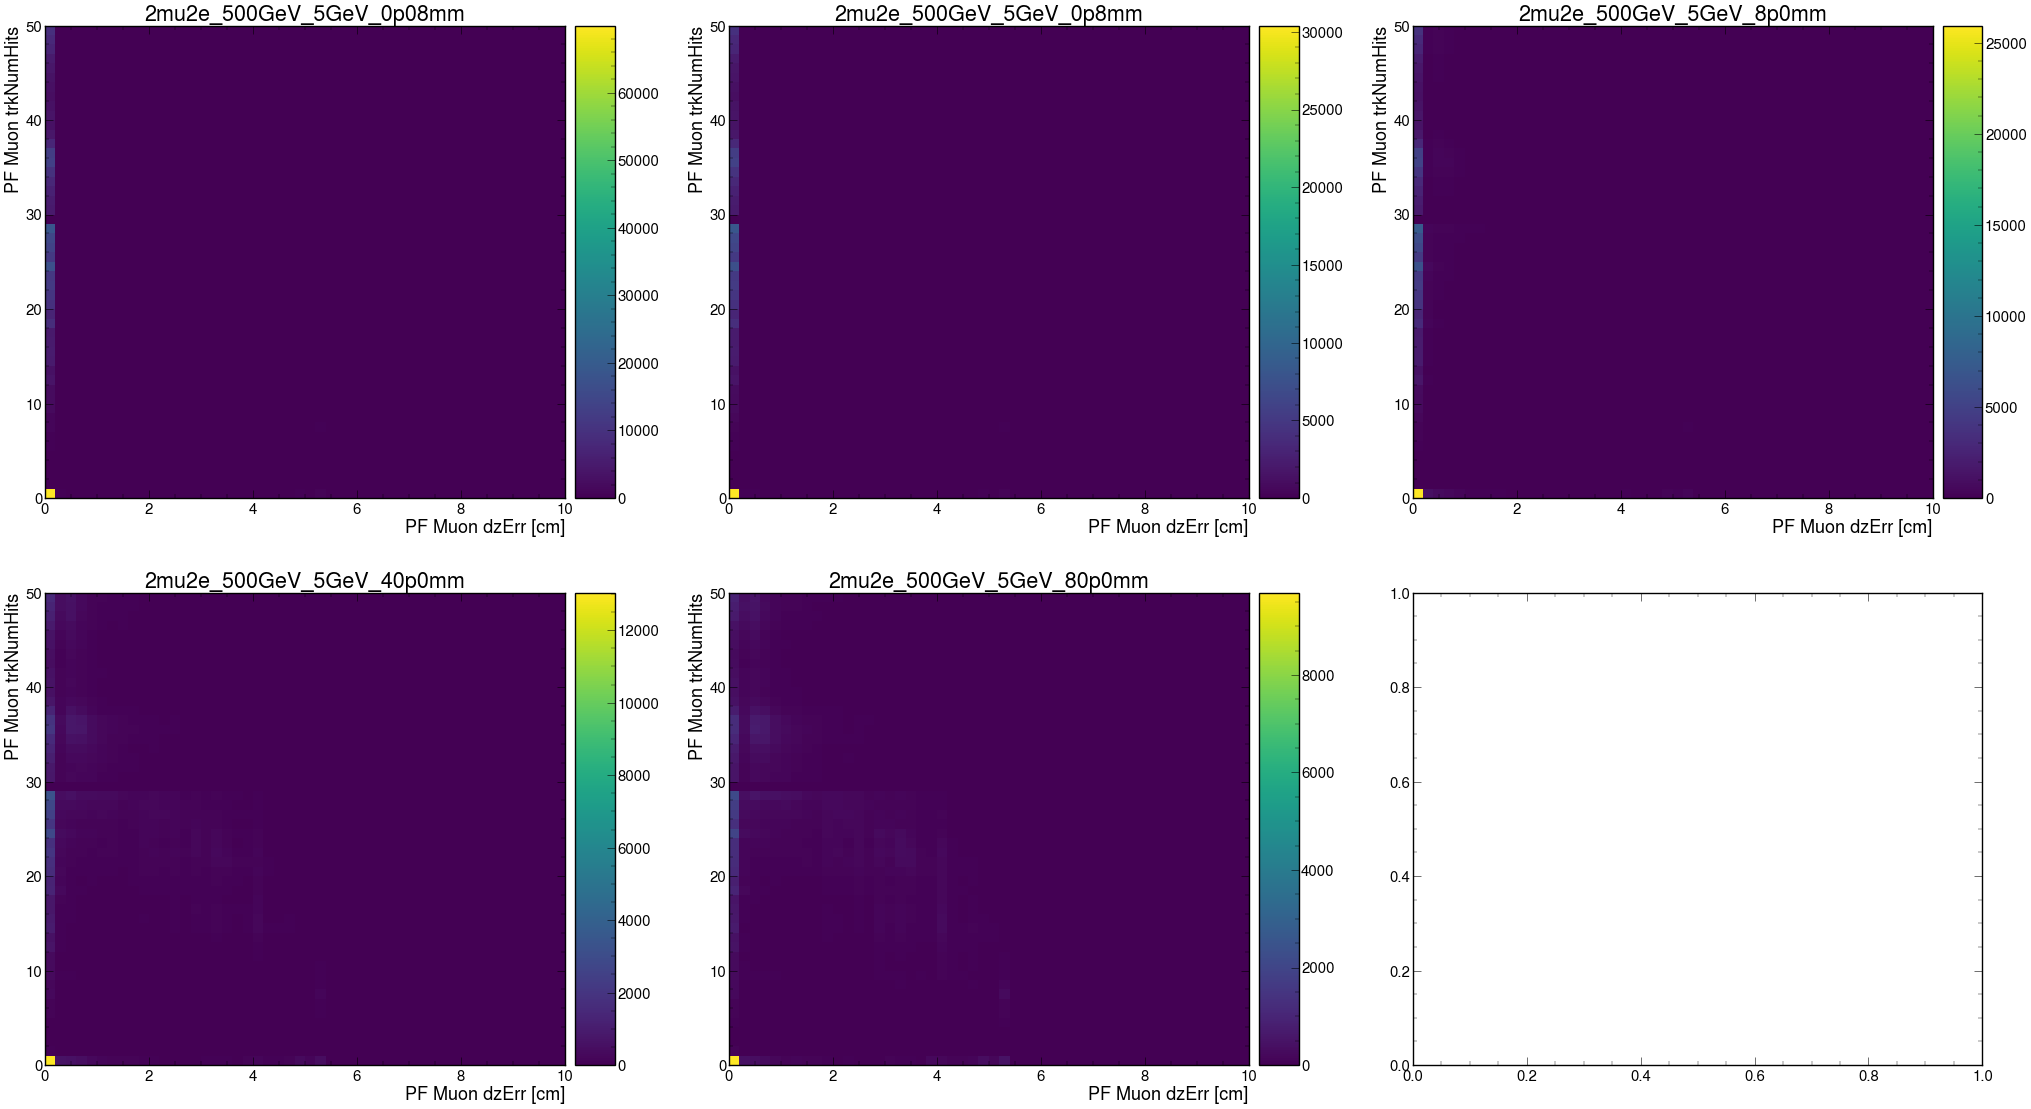

<Figure size 500x500 with 0 Axes>

In [11]:
fig, axs = plt.subplots(2, 3, figsize=(50, 27))

hep.hist2dplot(h1, ax=axs[0][0])
plt.title('2mu2e_500GeV_5GeV_0p08mm')
hep.hist2dplot(h2, ax=axs[0][1])
plt.title('2mu2e_500GeV_5GeV_0p8mm')
hep.hist2dplot(h3, ax=axs[0][2])
plt.title('2mu2e_500GeV_5GeV_8p0mm')
hep.hist2dplot(h4, ax=axs[1][0])
plt.title('2mu2e_500GeV_5GeV_40p0mm')
hep.hist2dplot(h5, ax=axs[1][1])
plt.title('2mu2e_500GeV_5GeV_80p0mm')

plt.show()
plt.savefig("../Plots/Test/2D/dzErr_trkNumHits_2mu2e.png", bbox_inches="tight")

In [12]:
h1 = Hist(
    hist.axis.Regular(50, 0, 10, name="dzErr", label="PF Muon dzErr [cm]", flow=False),
    hist.axis.Regular(50, 0, 50, name="trkNumHits", label="PF Muon trkNumHits", flow=False),
)
s1_data = ak.flatten(events_4mu['4mu_500GeV_5GeV_0p08mm'].dzErr)
w1_data = ak.flatten(events_4mu['4mu_500GeV_5GeV_0p08mm'].trkNumHits)

h1.fill(s1_data, w1_data)

h2 = Hist(
    hist.axis.Regular(50, 0, 10, name="dzErr", label="PF Muon dzErr [cm]", flow=False),
    hist.axis.Regular(50, 0, 50, name="trkNumHits", label="PF Muon trkNumHits", flow=False),
)
s2_data = ak.flatten(events_4mu['4mu_500GeV_5GeV_0p8mm'].dzErr)
w2_data = ak.flatten(events_4mu['4mu_500GeV_5GeV_0p8mm'].trkNumHits)

h2.fill(s2_data, w2_data)

h3 = Hist(
    hist.axis.Regular(50, 0, 10, name="dzErr", label="PF Muon dzErr [cm]", flow=False),
    hist.axis.Regular(50, 0, 50, name="trkNumHits", label="PF Muon trkNumHits", flow=False),
)
s3_data = ak.flatten(events_4mu['4mu_500GeV_5GeV_8p0mm'].dzErr)
w3_data = ak.flatten(events_4mu['4mu_500GeV_5GeV_8p0mm'].trkNumHits)

h3.fill(s3_data, w3_data)

h4 = Hist(
    hist.axis.Regular(50, 0, 10, name="dzErr", label="PF Muon dzErr [cm]", flow=False),
    hist.axis.Regular(50, 0, 50, name="trkNumHits", label="PF Muon trkNumHits", flow=False),
)
s4_data = ak.flatten(events_4mu['4mu_500GeV_5GeV_40p0mm'].dzErr)
w4_data = ak.flatten(events_4mu['4mu_500GeV_5GeV_40p0mm'].trkNumHits)

h4.fill(s4_data, w4_data)

h5 = Hist(
    hist.axis.Regular(50, 0, 10, name="dzErr", label="PF Muon dzErr [cm]", flow=False),
    hist.axis.Regular(50, 0, 50, name="trkNumHits", label="PF Muon trkNumHits", flow=False),
)
s5_data = ak.flatten(events_4mu['4mu_500GeV_5GeV_80p0mm'].dzErr)
w5_data = ak.flatten(events_4mu['4mu_500GeV_5GeV_80p0mm'].trkNumHits)

h5.fill(s5_data, w5_data)

Hist(
  Regular(50, 0, 10, underflow=False, overflow=False, name='dzErr', label='PF Muon dzErr [cm]'),
  Regular(50, 0, 50, underflow=False, overflow=False, name='trkNumHits', label='PF Muon trkNumHits'),
  storage=Double()) # Sum: 190638.0

  Regular(50, 0, 10, underflow=False, overflow=False, name='dzErr', label='PF Muon dzErr [cm]'),
  Regular(50, 0, 50, underflow=False, overflow=False, name='trkNumHits', label='PF Muon trkNumHits'),
  storage=Double()) # Sum: 444514.0
  Regular(50, 0, 10, underflow=False, overflow=False, name='dzErr', label='PF Muon dzErr [cm]'),
  Regular(50, 0, 50, underflow=False, overflow=False, name='trkNumHits', label='PF Muon trkNumHits'),
  storage=Double()) # Sum: 504554.0
  Regular(50, 0, 10, underflow=False, overflow=False, name='dzErr', label='PF Muon dzErr [cm]'),
  Regular(50, 0, 50, underflow=False, overflow=False, name='trkNumHits', label='PF Muon trkNumHits'),
  storage=Double()) # Sum: 485964.0
  Regular(50, 0, 10, underflow=False, overflow=False, name='dzErr', label='PF Muon dzErr [cm]'),
  Regular(50, 0, 50, underflow=False, overflow=False, name='trkNumHits', label='PF Muon trkNumHits'),
  storage=Double()) # Sum: 355967.0
  Regular(50, 0, 10, underflow=False, overflow=False, name='

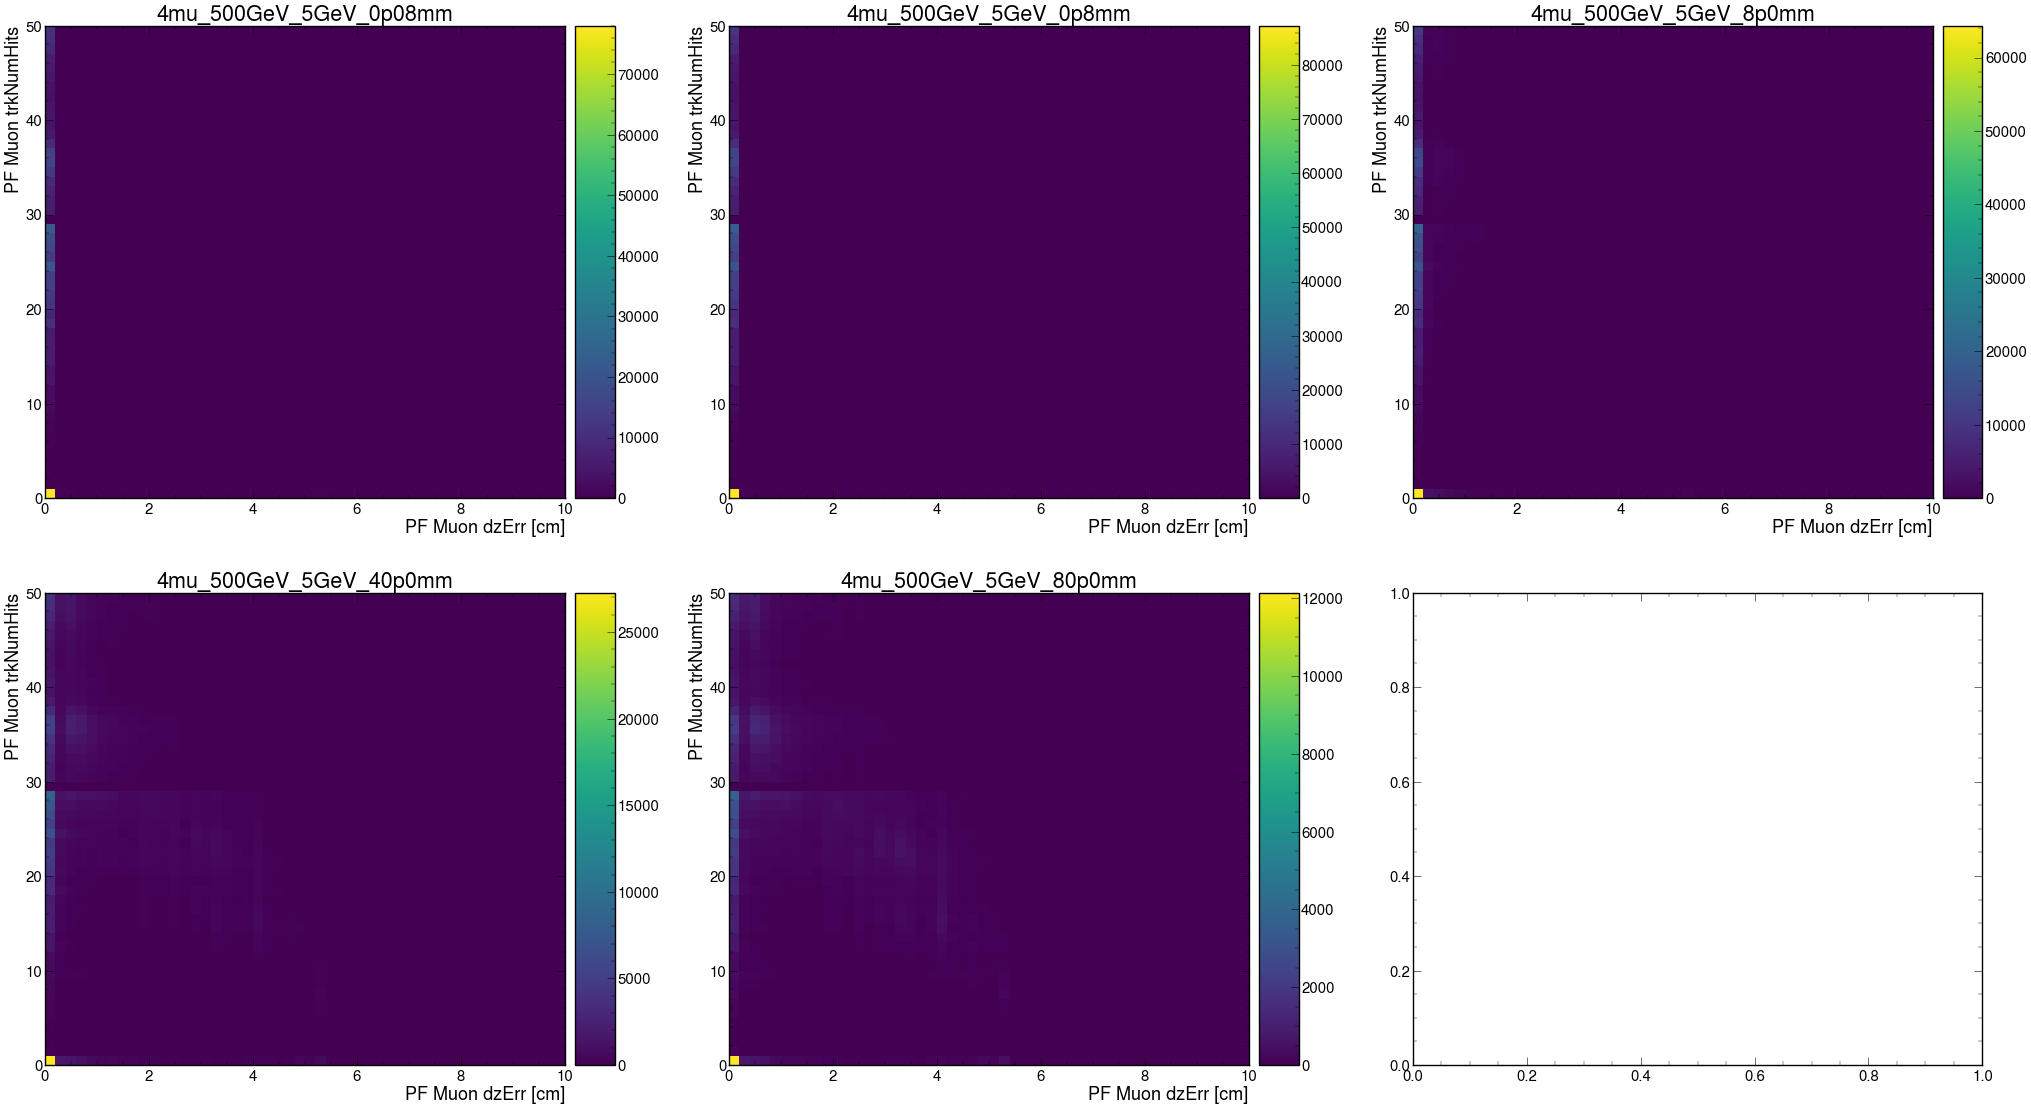

<Figure size 500x500 with 0 Axes>

In [13]:
fig, axs = plt.subplots(2, 3, figsize=(50, 27))

hep.hist2dplot(h1, ax=axs[0][0])
plt.title('4mu_500GeV_5GeV_0p08mm')
hep.hist2dplot(h2, ax=axs[0][1])
plt.title('4mu_500GeV_5GeV_0p8mm')
hep.hist2dplot(h3, ax=axs[0][2])
plt.title('4mu_500GeV_5GeV_8p0mm')
hep.hist2dplot(h4, ax=axs[1][0])
plt.title('4mu_500GeV_5GeV_40p0mm')
hep.hist2dplot(h5, ax=axs[1][1])
plt.title('4mu_500GeV_5GeV_80p0mm')

plt.show()
plt.savefig("../Plots/Test/2D/dzErr_trkNumHits_4mu.png", bbox_inches="tight")

In [14]:
h1 = Hist(
    hist.axis.Regular(50, 0, 0.2, name="dxyErr", label="PF Muon dxyErr [cm]", flow=False),
    hist.axis.Regular(50, -0.2, 0.2, name="dxy", label="PF Muon dxy", flow=False),
)
s1_data = ak.flatten(events_2mu2e['2mu2e_500GeV_5GeV_0p08mm'].dxyErr)
w1_data = ak.flatten(events_2mu2e['2mu2e_500GeV_5GeV_0p08mm'].dxy)

h1.fill(s1_data, w1_data)

h2 = Hist(
    hist.axis.Regular(50, 0, 0.2, name="dxyErr", label="PF Muon dxyErr [cm]", flow=False),
    hist.axis.Regular(50, -0.2, 0.2, name="dxy", label="PF Muon dxy", flow=False),
)
s2_data = ak.flatten(events_2mu2e['2mu2e_500GeV_5GeV_0p8mm'].dxyErr)
w2_data = ak.flatten(events_2mu2e['2mu2e_500GeV_5GeV_0p8mm'].dxy)

h2.fill(s2_data, w2_data)

h3 = Hist(
    hist.axis.Regular(50, 0, 0.2, name="dxyErr", label="PF Muon dxyErr [cm]", flow=False),
    hist.axis.Regular(50, -0.2, 0.2, name="dxy", label="PF Muon dxy", flow=False),
)
s3_data = ak.flatten(events_2mu2e['2mu2e_500GeV_5GeV_8p0mm'].dxyErr)
w3_data = ak.flatten(events_2mu2e['2mu2e_500GeV_5GeV_8p0mm'].dxy)

h3.fill(s3_data, w3_data)

h4 = Hist(
    hist.axis.Regular(50, 0, 0.2, name="dxyErr", label="PF Muon dxyErr [cm]", flow=False),
    hist.axis.Regular(50, -0.2, 0.2, name="dxy", label="PF Muon dxy", flow=False),
)
s4_data = ak.flatten(events_2mu2e['2mu2e_500GeV_5GeV_40p0mm'].dxyErr)
w4_data = ak.flatten(events_2mu2e['2mu2e_500GeV_5GeV_40p0mm'].dxy)

h4.fill(s4_data, w4_data)

h5 = Hist(
    hist.axis.Regular(50, 0, 0.2, name="dxyErr", label="PF Muon dxyErr [cm]", flow=False),
    hist.axis.Regular(50, -0.2, 0.2, name="dxy", label="PF Muon dxy", flow=False),
)
s5_data = ak.flatten(events_2mu2e['2mu2e_500GeV_5GeV_80p0mm'].dxyErr)
w5_data = ak.flatten(events_2mu2e['2mu2e_500GeV_5GeV_80p0mm'].dxy)

h5.fill(s5_data, w5_data)

Hist(
  Regular(50, 0, 0.2, underflow=False, overflow=False, name='dxyErr', label='PF Muon dxyErr [cm]'),
  Regular(50, -0.2, 0.2, underflow=False, overflow=False, name='dxy', label='PF Muon dxy'),
  storage=Double()) # Sum: 86454.0

  Regular(50, 0, 0.2, underflow=False, overflow=False, name='dxyErr', label='PF Muon dxyErr [cm]'),
  Regular(50, -0.2, 0.2, underflow=False, overflow=False, name='dxy', label='PF Muon dxy'),
  storage=Double()) # Sum: 367991.0
  Regular(50, 0, 0.2, underflow=False, overflow=False, name='dxyErr', label='PF Muon dxyErr [cm]'),
  Regular(50, -0.2, 0.2, underflow=False, overflow=False, name='dxy', label='PF Muon dxy'),
  storage=Double()) # Sum: 154531.0
  Regular(50, 0, 0.2, underflow=False, overflow=False, name='dxyErr', label='PF Muon dxyErr [cm]'),
  Regular(50, -0.2, 0.2, underflow=False, overflow=False, name='dxy', label='PF Muon dxy'),
  storage=Double()) # Sum: 112803.0
  Regular(50, 0, 0.2, underflow=False, overflow=False, name='dxyErr', label='PF Muon dxyErr [cm]'),
  Regular(50, -0.2, 0.2, underflow=False, overflow=False, name='dxy', label='PF Muon dxy'),
  storage=Double()) # Sum: 99034.0
  Regular(50, 0, 0.2, underflow=False, overflow=False, name='dxyErr', label='PF Muon dxyE

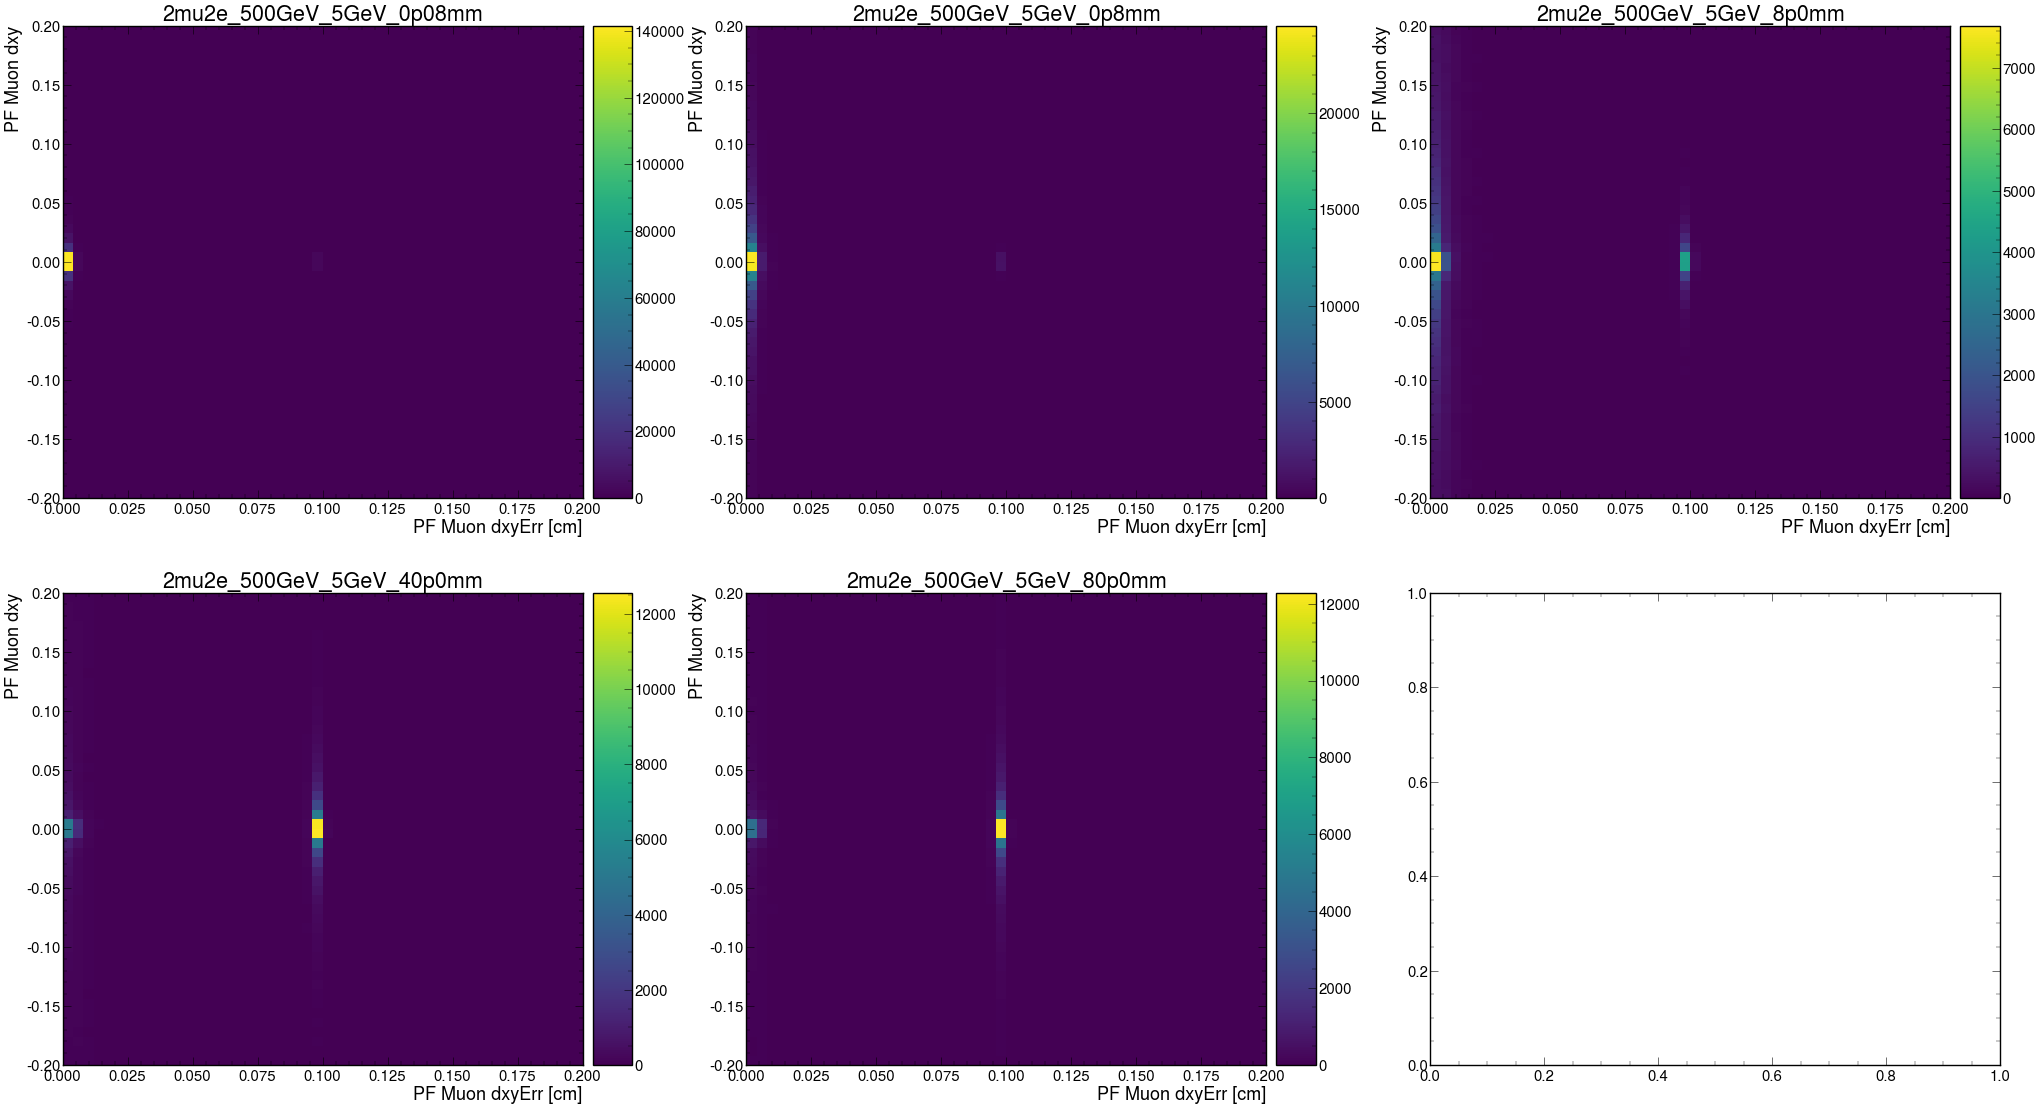

<Figure size 500x500 with 0 Axes>

In [15]:
fig, axs = plt.subplots(2, 3, figsize=(50, 27))

hep.hist2dplot(h1, ax=axs[0][0])
plt.title('2mu2e_500GeV_5GeV_0p08mm')
hep.hist2dplot(h2, ax=axs[0][1])
plt.title('2mu2e_500GeV_5GeV_0p8mm')
hep.hist2dplot(h3, ax=axs[0][2])
plt.title('2mu2e_500GeV_5GeV_8p0mm')
hep.hist2dplot(h4, ax=axs[1][0])
plt.title('2mu2e_500GeV_5GeV_40p0mm')
hep.hist2dplot(h5, ax=axs[1][1])
plt.title('2mu2e_500GeV_5GeV_80p0mm')

plt.show()
plt.savefig("../Plots/Test/2D/dxyErr_dxy_2mu2e.png", bbox_inches="tight")

In [16]:
h1 = Hist(
    hist.axis.Regular(50, 0, 0.2, name="dxyErr", label="PF Muon dxyErr [cm]", flow=False),
    hist.axis.Regular(50, -0.2, 0.2, name="dxy", label="PF Muon dxy", flow=False),
)
s1_data = ak.flatten(events_4mu['4mu_500GeV_5GeV_0p08mm'].dxyErr)
w1_data = ak.flatten(events_4mu['4mu_500GeV_5GeV_0p08mm'].dxy)

h1.fill(s1_data, w1_data)

h2 = Hist(
    hist.axis.Regular(50, 0, 0.2, name="dxyErr", label="PF Muon dxyErr [cm]", flow=False),
    hist.axis.Regular(50, -0.2, 0.2, name="dxy", label="PF Muon dxy", flow=False),
)
s2_data = ak.flatten(events_4mu['4mu_500GeV_5GeV_0p8mm'].dxyErr)
w2_data = ak.flatten(events_4mu['4mu_500GeV_5GeV_0p8mm'].dxy)

h2.fill(s2_data, w2_data)

h3 = Hist(
    hist.axis.Regular(50, 0, 0.2, name="dxyErr", label="PF Muon dxyErr [cm]", flow=False),
    hist.axis.Regular(50, -0.2, 0.2, name="dxy", label="PF Muon dxy", flow=False),
)
s3_data = ak.flatten(events_4mu['4mu_500GeV_5GeV_8p0mm'].dxyErr)
w3_data = ak.flatten(events_4mu['4mu_500GeV_5GeV_8p0mm'].dxy)

h3.fill(s3_data, w3_data)

h4 = Hist(
    hist.axis.Regular(50, 0, 0.2, name="dxyErr", label="PF Muon dxyErr [cm]", flow=False),
    hist.axis.Regular(50, -0.2, 0.2, name="dxy", label="PF Muon dxy", flow=False),
)
s4_data = ak.flatten(events_4mu['4mu_500GeV_5GeV_40p0mm'].dxyErr)
w4_data = ak.flatten(events_4mu['4mu_500GeV_5GeV_40p0mm'].dxy)

h4.fill(s4_data, w4_data)

h5 = Hist(
    hist.axis.Regular(50, 0, 0.2, name="dxyErr", label="PF Muon dxyErr [cm]", flow=False),
    hist.axis.Regular(50, -0.2, 0.2, name="dxy", label="PF Muon dxy", flow=False),
)
s5_data = ak.flatten(events_4mu['4mu_500GeV_5GeV_80p0mm'].dxyErr)
w5_data = ak.flatten(events_4mu['4mu_500GeV_5GeV_80p0mm'].dxy)

h5.fill(s5_data, w5_data)

Hist(
  Regular(50, 0, 0.2, underflow=False, overflow=False, name='dxyErr', label='PF Muon dxyErr [cm]'),
  Regular(50, -0.2, 0.2, underflow=False, overflow=False, name='dxy', label='PF Muon dxy'),
  storage=Double()) # Sum: 141762.0

  Regular(50, 0, 0.2, underflow=False, overflow=False, name='dxyErr', label='PF Muon dxyErr [cm]'),
  Regular(50, -0.2, 0.2, underflow=False, overflow=False, name='dxy', label='PF Muon dxy'),
  storage=Double()) # Sum: 437332.0
  Regular(50, 0, 0.2, underflow=False, overflow=False, name='dxyErr', label='PF Muon dxyErr [cm]'),
  Regular(50, -0.2, 0.2, underflow=False, overflow=False, name='dxy', label='PF Muon dxy'),
  storage=Double()) # Sum: 472105.0
  Regular(50, 0, 0.2, underflow=False, overflow=False, name='dxyErr', label='PF Muon dxyErr [cm]'),
  Regular(50, -0.2, 0.2, underflow=False, overflow=False, name='dxy', label='PF Muon dxy'),
  storage=Double()) # Sum: 301692.0
  Regular(50, 0, 0.2, underflow=False, overflow=False, name='dxyErr', label='PF Muon dxyErr [cm]'),
  Regular(50, -0.2, 0.2, underflow=False, overflow=False, name='dxy', label='PF Muon dxy'),
  storage=Double()) # Sum: 245773.0
  Regular(50, 0, 0.2, underflow=False, overflow=False, name='dxyErr', label='PF Muon dxy

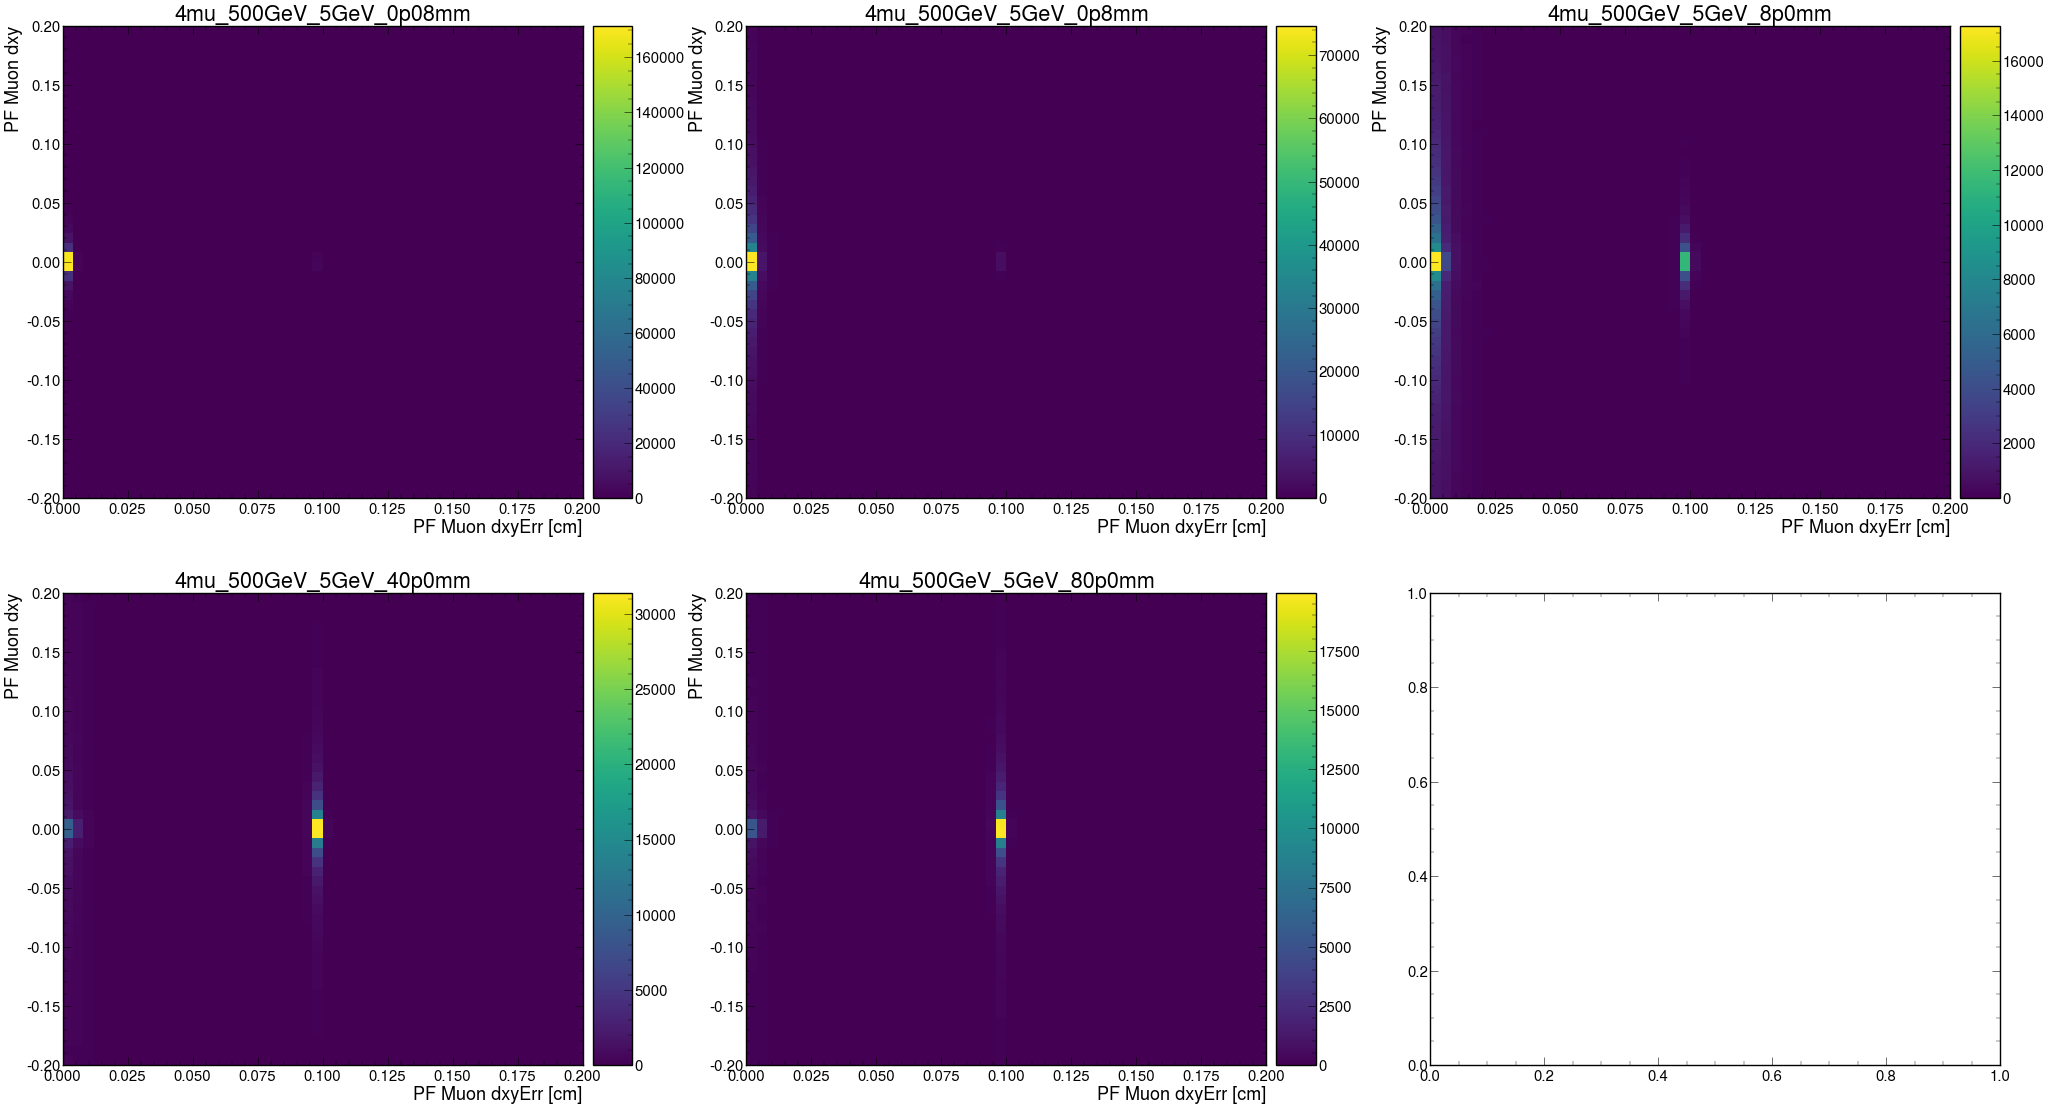

In [17]:
fig, axs = plt.subplots(2, 3, figsize=(50, 27))

hep.hist2dplot(h1, ax=axs[0][0])
plt.title('4mu_500GeV_5GeV_0p08mm')
hep.hist2dplot(h2, ax=axs[0][1])
plt.title('4mu_500GeV_5GeV_0p8mm')
hep.hist2dplot(h3, ax=axs[0][2])
plt.title('4mu_500GeV_5GeV_8p0mm')
hep.hist2dplot(h4, ax=axs[1][0])
plt.title('4mu_500GeV_5GeV_40p0mm')
hep.hist2dplot(h5, ax=axs[1][1])
plt.title('4mu_500GeV_5GeV_80p0mm')

plt.show()

In [18]:
h1 = Hist(
    hist.axis.Regular(50, 0, 6, name="dzErr", label="PF Muon dzErr [cm]", flow=False),
    hist.axis.Regular(50, -6, 6, name="dz", label="PF Muon dz", flow=False),
)
s1_data = ak.flatten(events_2mu2e['2mu2e_500GeV_5GeV_0p08mm'].dzErr)
w1_data = ak.flatten(events_2mu2e['2mu2e_500GeV_5GeV_0p08mm'].dz)

h1.fill(s1_data, w1_data)

h2 = Hist(
    hist.axis.Regular(50, 0, 6, name="dzErr", label="PF Muon dzErr [cm]", flow=False),
    hist.axis.Regular(50, -6, 6, name="dz", label="PF Muon dz", flow=False),
)
s2_data = ak.flatten(events_2mu2e['2mu2e_500GeV_5GeV_0p8mm'].dzErr)
w2_data = ak.flatten(events_2mu2e['2mu2e_500GeV_5GeV_0p8mm'].dz)

h2.fill(s2_data, w2_data)

h3 = Hist(
    hist.axis.Regular(50, 0, 6, name="dzErr", label="PF Muon dzErr [cm]", flow=False),
    hist.axis.Regular(50, -6, 6, name="dz", label="PF Muon dz", flow=False),
)
s3_data = ak.flatten(events_2mu2e['2mu2e_500GeV_5GeV_8p0mm'].dzErr)
w3_data = ak.flatten(events_2mu2e['2mu2e_500GeV_5GeV_8p0mm'].dz)

h3.fill(s3_data, w3_data)

h4 = Hist(
    hist.axis.Regular(50, 0, 6, name="dzErr", label="PF Muon dzErr [cm]", flow=False),
    hist.axis.Regular(50, -6, 6, name="dz", label="PF Muon dz", flow=False),
)
s4_data = ak.flatten(events_2mu2e['2mu2e_500GeV_5GeV_40p0mm'].dzErr)
w4_data = ak.flatten(events_2mu2e['2mu2e_500GeV_5GeV_40p0mm'].dz)

h4.fill(s4_data, w4_data)

h5 = Hist(
    hist.axis.Regular(50, 0, 6, name="dzErr", label="PF Muon dzErr [cm]", flow=False),
    hist.axis.Regular(50, -6, 6, name="dz", label="PF Muon dz", flow=False),
)
s5_data = ak.flatten(events_2mu2e['2mu2e_500GeV_5GeV_80p0mm'].dzErr)
w5_data = ak.flatten(events_2mu2e['2mu2e_500GeV_5GeV_80p0mm'].dz)

h5.fill(s5_data, w5_data)

Hist(
  Regular(50, 0, 6, underflow=False, overflow=False, name='dzErr', label='PF Muon dzErr [cm]'),
  Regular(50, -6, 6, underflow=False, overflow=False, name='dz', label='PF Muon dz'),
  storage=Double()) # Sum: 85152.0

  Regular(50, 0, 6, underflow=False, overflow=False, name='dzErr', label='PF Muon dzErr [cm]'),
  Regular(50, -6, 6, underflow=False, overflow=False, name='dz', label='PF Muon dz'),
  storage=Double()) # Sum: 364466.0
  Regular(50, 0, 6, underflow=False, overflow=False, name='dzErr', label='PF Muon dzErr [cm]'),
  Regular(50, -6, 6, underflow=False, overflow=False, name='dz', label='PF Muon dz'),
  storage=Double()) # Sum: 159967.0
  Regular(50, 0, 6, underflow=False, overflow=False, name='dzErr', label='PF Muon dzErr [cm]'),
  Regular(50, -6, 6, underflow=False, overflow=False, name='dz', label='PF Muon dz'),
  storage=Double()) # Sum: 159890.0
  Regular(50, 0, 6, underflow=False, overflow=False, name='dzErr', label='PF Muon dzErr [cm]'),
  Regular(50, -6, 6, underflow=False, overflow=False, name='dz', label='PF Muon dz'),
  storage=Double()) # Sum: 110633.0
  Regular(50, 0, 6, underflow=False, overflow=False, name='dzErr', label='PF Muon dzErr [cm]'),
  Regular(50, -6, 6, underflow=F

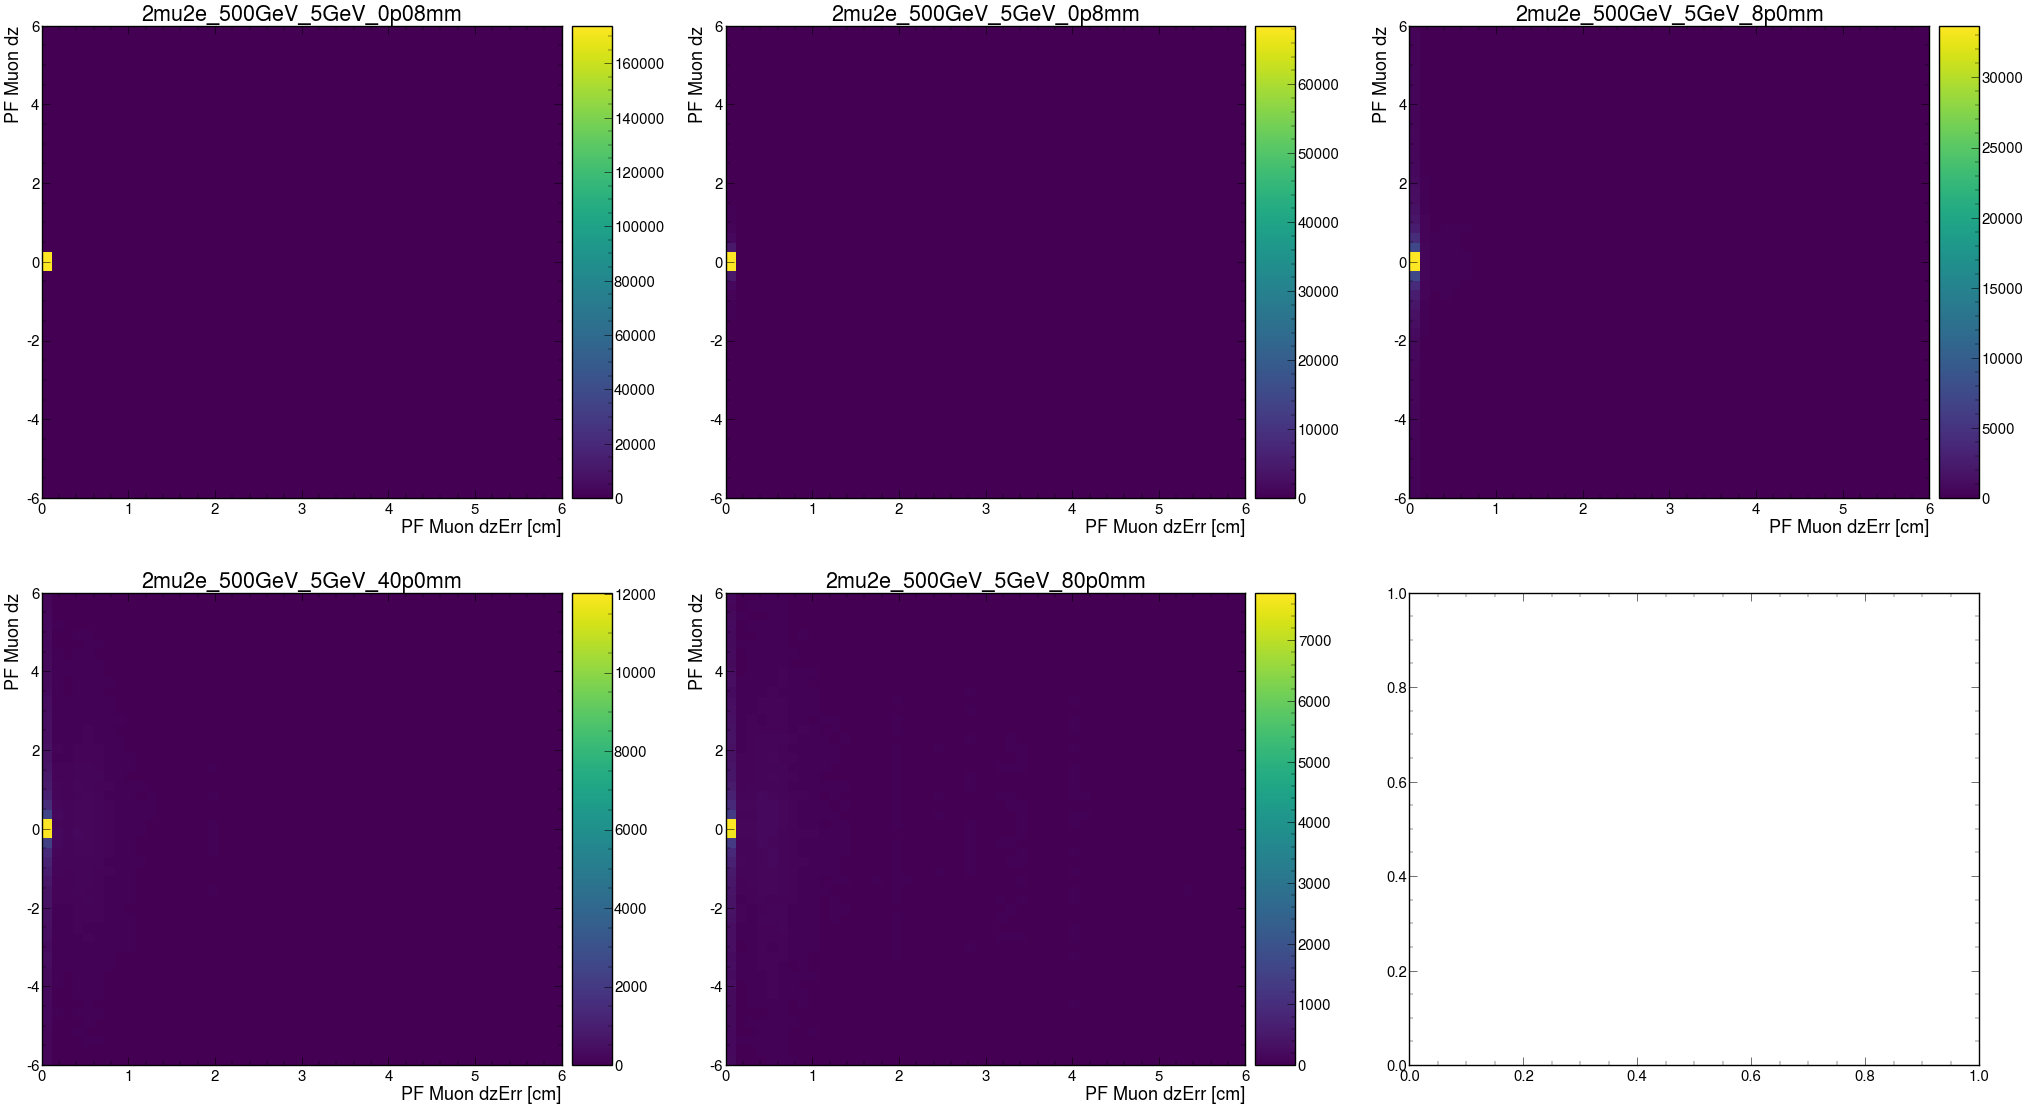

In [19]:
fig, axs = plt.subplots(2, 3, figsize=(50, 27))

hep.hist2dplot(h1, ax=axs[0][0])
plt.title('2mu2e_500GeV_5GeV_0p08mm')
hep.hist2dplot(h2, ax=axs[0][1])
plt.title('2mu2e_500GeV_5GeV_0p8mm')
hep.hist2dplot(h3, ax=axs[0][2])
plt.title('2mu2e_500GeV_5GeV_8p0mm')
hep.hist2dplot(h4, ax=axs[1][0])
plt.title('2mu2e_500GeV_5GeV_40p0mm')
hep.hist2dplot(h5, ax=axs[1][1])
plt.title('2mu2e_500GeV_5GeV_80p0mm')

plt.show()

In [20]:
h1 = Hist(
    hist.axis.Regular(50, 0, 6, name="dzErr", label="PF Muon dzErr [cm]", flow=False),
    hist.axis.Regular(50, -6, 6, name="dz", label="PF Muon dz", flow=False),
)
s1_data = ak.flatten(events_4mu['4mu_500GeV_5GeV_0p08mm'].dzErr)
w1_data = ak.flatten(events_4mu['4mu_500GeV_5GeV_0p08mm'].dz)

h1.fill(s1_data, w1_data)

h2 = Hist(
    hist.axis.Regular(50, 0, 6, name="dzErr", label="PF Muon dzErr [cm]", flow=False),
    hist.axis.Regular(50, -6, 6, name="dz", label="PF Muon dz", flow=False),
)
s2_data = ak.flatten(events_4mu['4mu_500GeV_5GeV_0p8mm'].dzErr)
w2_data = ak.flatten(events_4mu['4mu_500GeV_5GeV_0p8mm'].dz)

h2.fill(s2_data, w2_data)

h3 = Hist(
    hist.axis.Regular(50, 0, 6, name="dzErr", label="PF Muon dzErr [cm]", flow=False),
    hist.axis.Regular(50, -6, 6, name="dz", label="PF Muon dz", flow=False),
)
s3_data = ak.flatten(events_4mu['4mu_500GeV_5GeV_8p0mm'].dzErr)
w3_data = ak.flatten(events_4mu['4mu_500GeV_5GeV_8p0mm'].dz)

h3.fill(s3_data, w3_data)

h4 = Hist(
    hist.axis.Regular(50, 0, 6, name="dzErr", label="PF Muon dzErr [cm]", flow=False),
    hist.axis.Regular(50, -6, 6, name="dz", label="PF Muon dz", flow=False),
)
s4_data = ak.flatten(events_4mu['4mu_500GeV_5GeV_40p0mm'].dzErr)
w4_data = ak.flatten(events_4mu['4mu_500GeV_5GeV_40p0mm'].dz)

h4.fill(s4_data, w4_data)

h5 = Hist(
    hist.axis.Regular(50, 0, 6, name="dzErr", label="PF Muon dzErr [cm]", flow=False),
    hist.axis.Regular(50, -6, 6, name="dz", label="PF Muon dz", flow=False),
)
s5_data = ak.flatten(events_4mu['4mu_500GeV_5GeV_80p0mm'].dzErr)
w5_data = ak.flatten(events_4mu['4mu_500GeV_5GeV_80p0mm'].dz)

h5.fill(s5_data, w5_data)

Hist(
  Regular(50, 0, 6, underflow=False, overflow=False, name='dzErr', label='PF Muon dzErr [cm]'),
  Regular(50, -6, 6, underflow=False, overflow=False, name='dz', label='PF Muon dz'),
  storage=Double()) # Sum: 140598.0

  Regular(50, 0, 6, underflow=False, overflow=False, name='dzErr', label='PF Muon dzErr [cm]'),
  Regular(50, -6, 6, underflow=False, overflow=False, name='dz', label='PF Muon dz'),
  storage=Double()) # Sum: 434722.0
  Regular(50, 0, 6, underflow=False, overflow=False, name='dzErr', label='PF Muon dzErr [cm]'),
  Regular(50, -6, 6, underflow=False, overflow=False, name='dz', label='PF Muon dz'),
  storage=Double()) # Sum: 488898.0
  Regular(50, 0, 6, underflow=False, overflow=False, name='dzErr', label='PF Muon dzErr [cm]'),
  Regular(50, -6, 6, underflow=False, overflow=False, name='dz', label='PF Muon dz'),
  storage=Double()) # Sum: 437641.0
  Regular(50, 0, 6, underflow=False, overflow=False, name='dzErr', label='PF Muon dzErr [cm]'),
  Regular(50, -6, 6, underflow=False, overflow=False, name='dz', label='PF Muon dz'),
  storage=Double()) # Sum: 279088.0
  Regular(50, 0, 6, underflow=False, overflow=False, name='dzErr', label='PF Muon dzErr [cm]'),
  Regular(50, -6, 6, underflow=F

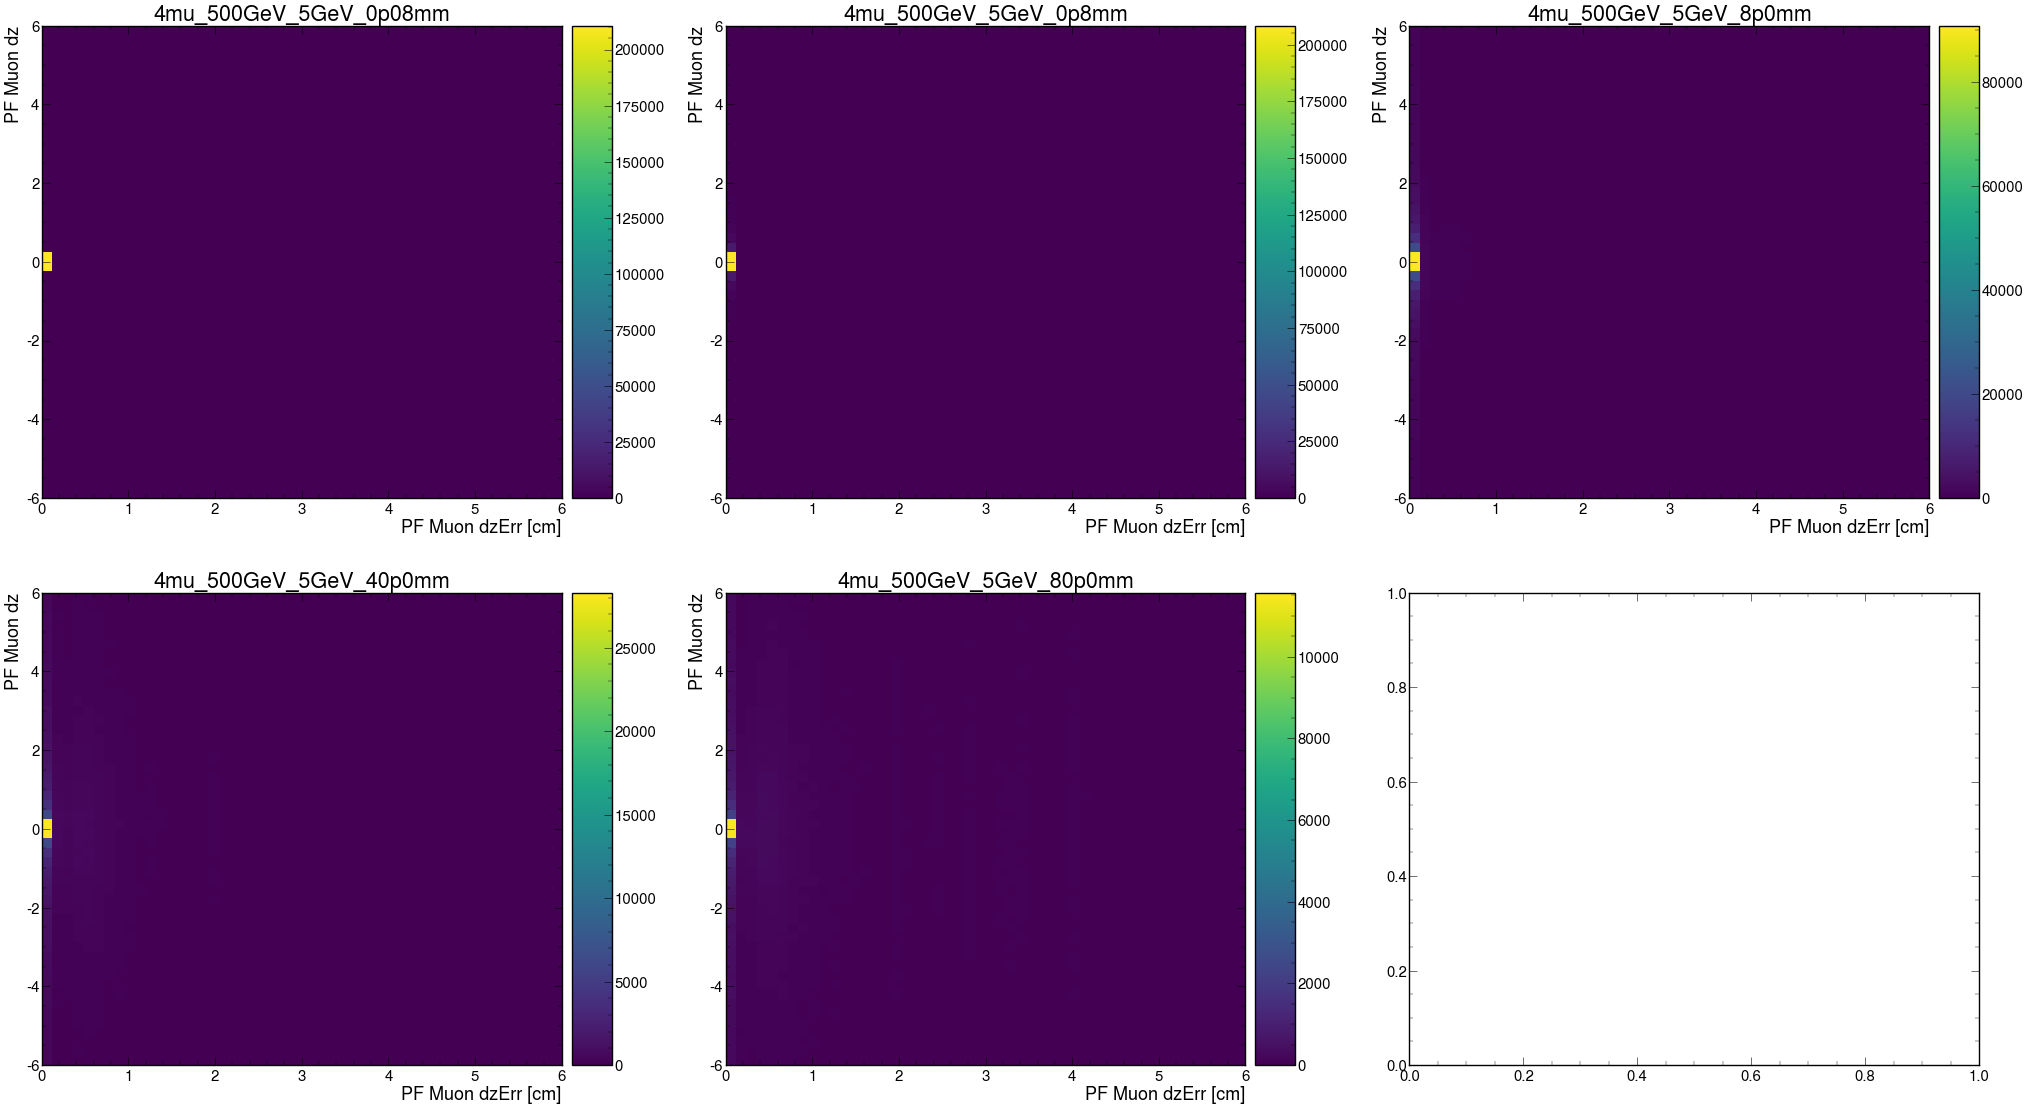

In [21]:
fig, axs = plt.subplots(2, 3, figsize=(50, 27))

hep.hist2dplot(h1, ax=axs[0][0])
plt.title('4mu_500GeV_5GeV_0p08mm')
hep.hist2dplot(h2, ax=axs[0][1])
plt.title('4mu_500GeV_5GeV_0p8mm')
hep.hist2dplot(h3, ax=axs[0][2])
plt.title('4mu_500GeV_5GeV_8p0mm')
hep.hist2dplot(h4, ax=axs[1][0])
plt.title('4mu_500GeV_5GeV_40p0mm')
hep.hist2dplot(h5, ax=axs[1][1])
plt.title('4mu_500GeV_5GeV_80p0mm')

plt.show()

In [22]:
h1 = Hist(
    hist.axis.Regular(50, -0.1, 0.1, name="outerPhi", label="PF Muon (phi - outerPhi)", flow=False),
    hist.axis.Regular(50, 0, 300, name="pt", label="PF Muon pt [GeV]", flow=False),
)
s1_data = ak.flatten(events_4mu['4mu_500GeV_5GeV_0p08mm'].phi - events_4mu['4mu_500GeV_5GeV_0p08mm'].outerPhi)
w1_data = ak.flatten(events_4mu['4mu_500GeV_5GeV_0p08mm'].pt)

h1.fill(s1_data, w1_data)

h2 = Hist(
    hist.axis.Regular(50, -0.1, 0.1, name="outerPhi", label="PF Muon (phi - outerPhi)", flow=False),
    hist.axis.Regular(50, 0, 300, name="pt", label="PF Muon pt [GeV]", flow=False),
)
s2_data = ak.flatten(events_4mu['4mu_500GeV_5GeV_0p8mm'].phi - events_4mu['4mu_500GeV_5GeV_0p8mm'].outerPhi)
w2_data = ak.flatten(events_4mu['4mu_500GeV_5GeV_0p8mm'].pt)

h2.fill(s2_data, w2_data)

h3 = Hist(
    hist.axis.Regular(50, -0.1, 0.1, name="outerPhi", label="PF Muon (phi - outerPhi)", flow=False),
    hist.axis.Regular(50, 0, 300, name="pt", label="PF Muon pt [GeV]", flow=False),
)
s3_data = ak.flatten(events_4mu['4mu_500GeV_5GeV_8p0mm'].phi - events_4mu['4mu_500GeV_5GeV_8p0mm'].outerPhi)
w3_data = ak.flatten(events_4mu['4mu_500GeV_5GeV_8p0mm'].pt)

h3.fill(s3_data, w3_data)

h4 = Hist(
    hist.axis.Regular(50, -0.1, 0.1, name="outerPhi", label="PF Muon (phi - outerPhi)", flow=False),
    hist.axis.Regular(50, 0, 300, name="pt", label="PF Muon pt [GeV]", flow=False),
)
s4_data = ak.flatten(events_4mu['4mu_500GeV_5GeV_40p0mm'].phi - events_4mu['4mu_500GeV_5GeV_40p0mm'].outerPhi)
w4_data = ak.flatten(events_4mu['4mu_500GeV_5GeV_40p0mm'].pt)

h4.fill(s4_data, w4_data)

h5 = Hist(
    hist.axis.Regular(50, -0.1, 0.1, name="outerPhi", label="PF Muon (phi - outerPhi)", flow=False),
    hist.axis.Regular(50, 0, 300, name="pt", label="PF Muon pt [GeV]", flow=False),
)
s5_data = ak.flatten(events_4mu['4mu_500GeV_5GeV_80p0mm'].phi - events_4mu['4mu_500GeV_5GeV_80p0mm'].outerPhi)
w5_data = ak.flatten(events_4mu['4mu_500GeV_5GeV_80p0mm'].pt)

h5.fill(s5_data, w5_data)

Hist(
  Regular(50, -0.1, 0.1, underflow=False, overflow=False, name='outerPhi', label='PF Muon (phi - outerPhi)'),
  Regular(50, 0, 300, underflow=False, overflow=False, name='pt', label='PF Muon pt [GeV]'),
  storage=Double()) # Sum: 134072.0

  Regular(50, -0.1, 0.1, underflow=False, overflow=False, name='outerPhi', label='PF Muon (phi - outerPhi)'),
  Regular(50, 0, 300, underflow=False, overflow=False, name='pt', label='PF Muon pt [GeV]'),
  storage=Double()) # Sum: 365999.0
  Regular(50, -0.1, 0.1, underflow=False, overflow=False, name='outerPhi', label='PF Muon (phi - outerPhi)'),
  Regular(50, 0, 300, underflow=False, overflow=False, name='pt', label='PF Muon pt [GeV]'),
  storage=Double()) # Sum: 414991.0
  Regular(50, -0.1, 0.1, underflow=False, overflow=False, name='outerPhi', label='PF Muon (phi - outerPhi)'),
  Regular(50, 0, 300, underflow=False, overflow=False, name='pt', label='PF Muon pt [GeV]'),
  storage=Double()) # Sum: 394668.0
  Regular(50, -0.1, 0.1, underflow=False, overflow=False, name='outerPhi', label='PF Muon (phi - outerPhi)'),
  Regular(50, 0, 300, underflow=False, overflow=False, name='pt', label='PF Muon pt [GeV]'),
  storage=Double()) # Sum: 263866.0
  Regular(50, -0.1, 0.1, underflow=False, ov

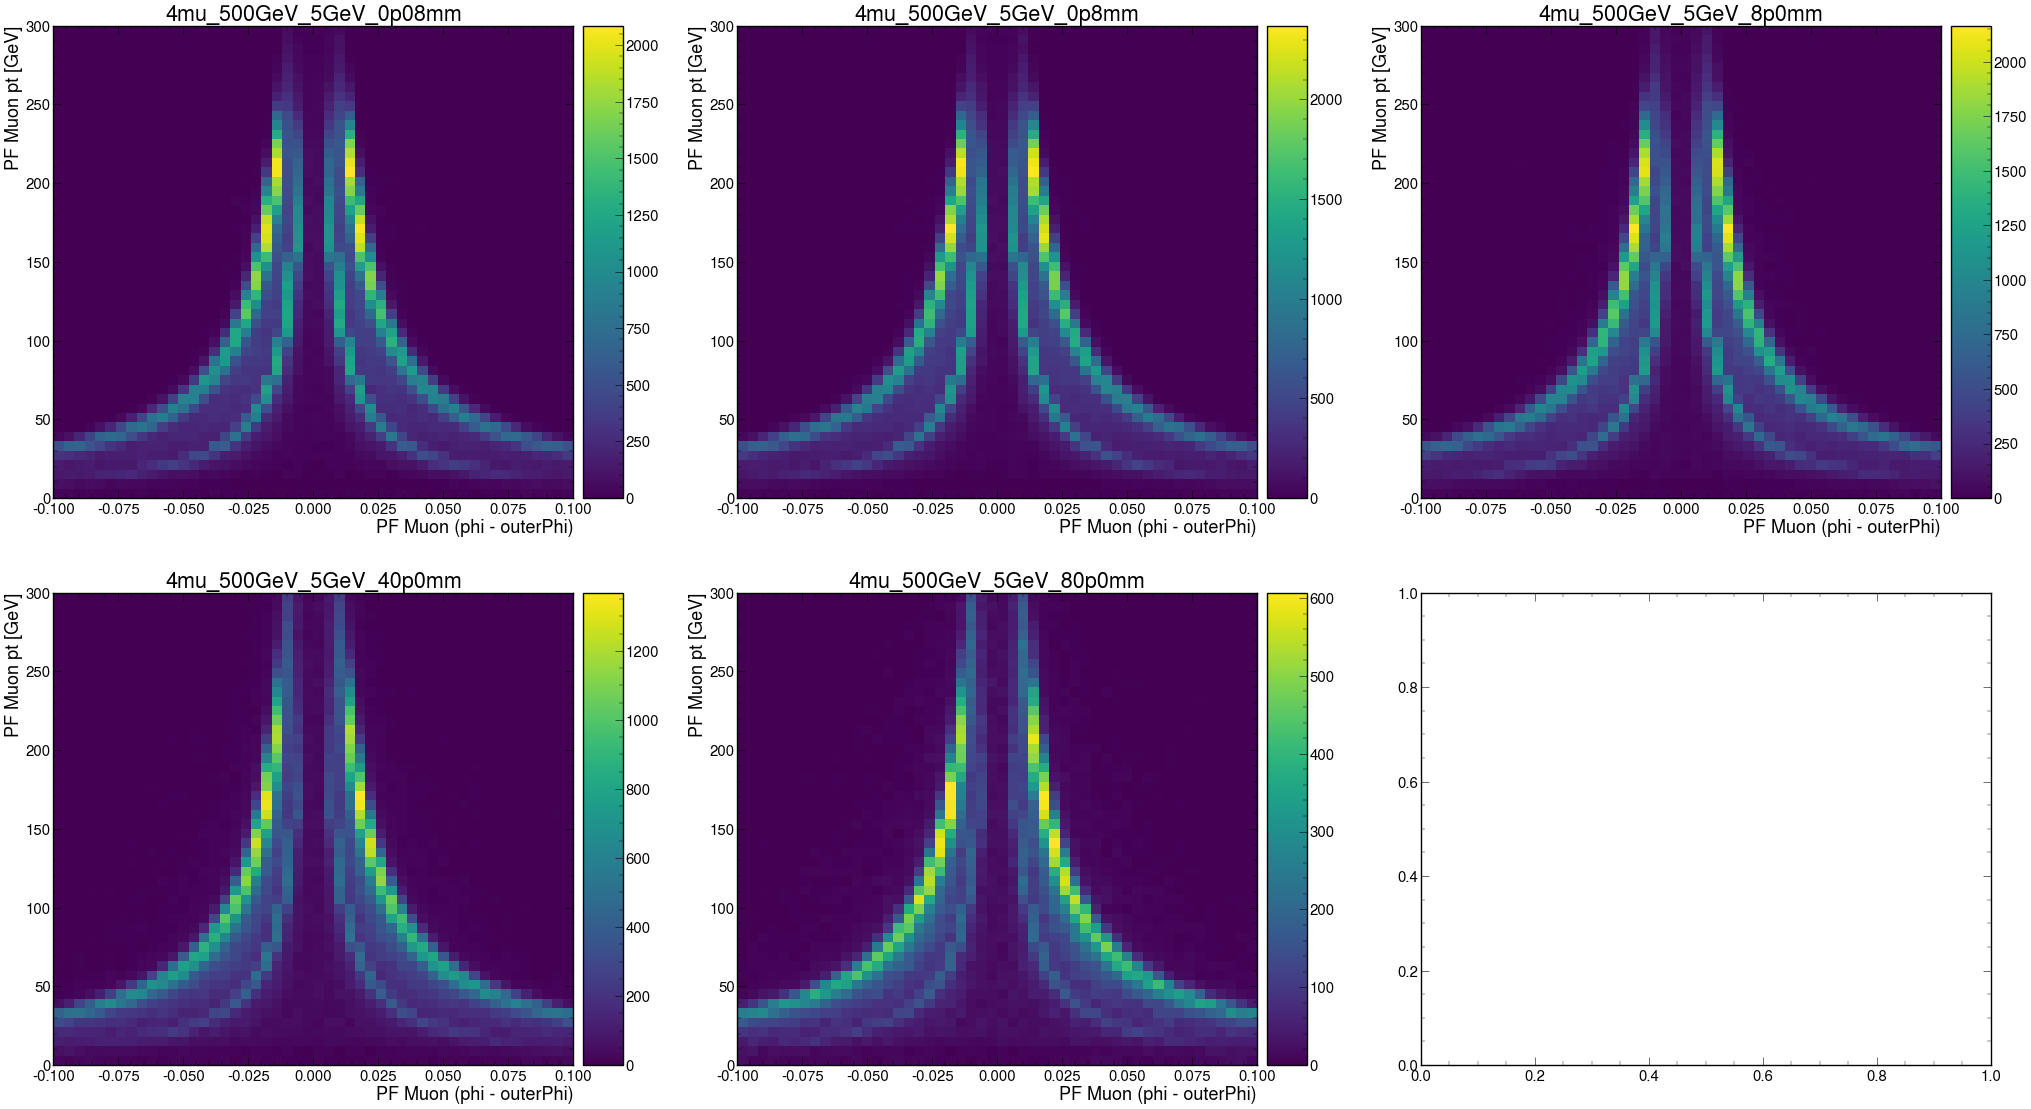

In [23]:
fig, axs = plt.subplots(2, 3, figsize=(50, 27))

hep.hist2dplot(h1, ax=axs[0][0])
plt.title('4mu_500GeV_5GeV_0p08mm')
hep.hist2dplot(h2, ax=axs[0][1])
plt.title('4mu_500GeV_5GeV_0p8mm')
hep.hist2dplot(h3, ax=axs[0][2])
plt.title('4mu_500GeV_5GeV_8p0mm')
hep.hist2dplot(h4, ax=axs[1][0])
plt.title('4mu_500GeV_5GeV_40p0mm')
hep.hist2dplot(h5, ax=axs[1][1])
plt.title('4mu_500GeV_5GeV_80p0mm')

plt.show()

In [30]:
h1 = Hist(
    hist.axis.Regular(50, -0.1, 0.1, name="outerPhi", label="PF Muon (phi - outerPhi)", flow=False),
    hist.axis.Regular(50, -3.2, 3.2, name="outerEta", label="PF Muon outerEta", flow=False),
)
s1_data = ak.flatten(events_4mu['4mu_500GeV_5GeV_0p08mm'].phi - events_4mu['4mu_500GeV_5GeV_0p08mm'].outerPhi)
w1_data = ak.flatten(events_4mu['4mu_500GeV_5GeV_0p08mm'].outerEta)

h1.fill(s1_data, w1_data)

h2 = Hist(
    hist.axis.Regular(50, -0.1, 0.1, name="outerPhi", label="PF Muon (phi - outerPhi)", flow=False),
    hist.axis.Regular(50, -3.2, 3.2, name="outerEta", label="PF Muon outerEta", flow=False),
)
s2_data = ak.flatten(events_4mu['4mu_500GeV_5GeV_0p8mm'].phi - events_4mu['4mu_500GeV_5GeV_0p8mm'].outerPhi)
w2_data = ak.flatten(events_4mu['4mu_500GeV_5GeV_0p8mm'].outerEta)

h2.fill(s2_data, w2_data)

h3 = Hist(
    hist.axis.Regular(50, -0.1, 0.1, name="outerPhi", label="PF Muon (phi - outerPhi)", flow=False),
    hist.axis.Regular(50, -3.2, 3.2, name="outerEta", label="PF Muon outerEta", flow=False),
)
s3_data = ak.flatten(events_4mu['4mu_500GeV_5GeV_8p0mm'].phi - events_4mu['4mu_500GeV_5GeV_8p0mm'].outerPhi)
w3_data = ak.flatten(events_4mu['4mu_500GeV_5GeV_8p0mm'].outerEta)

h3.fill(s3_data, w3_data)

h4 = Hist(
    hist.axis.Regular(50, -0.1, 0.1, name="outerPhi", label="PF Muon (phi - outerPhi)", flow=False),
    hist.axis.Regular(50, -3.2, 3.2, name="outerEta", label="PF Muon outerEta", flow=False),
)
s4_data = ak.flatten(events_4mu['4mu_500GeV_5GeV_40p0mm'].phi - events_4mu['4mu_500GeV_5GeV_40p0mm'].outerPhi)
w4_data = ak.flatten(events_4mu['4mu_500GeV_5GeV_40p0mm'].outerEta)

h4.fill(s4_data, w4_data)

h5 = Hist(
    hist.axis.Regular(50, -0.1, 0.1, name="outerPhi", label="PF Muon (phi - outerPhi)", flow=False),
    hist.axis.Regular(50, -3.2, 3.2, name="outerEta", label="PF Muon outerEta", flow=False),
)
s5_data = ak.flatten(events_4mu['4mu_500GeV_5GeV_80p0mm'].phi - events_4mu['4mu_500GeV_5GeV_80p0mm'].outerPhi)
w5_data = ak.flatten(events_4mu['4mu_500GeV_5GeV_80p0mm'].outerEta)

h5.fill(s5_data, w5_data)

Hist(
  Regular(50, -0.1, 0.1, underflow=False, overflow=False, name='outerPhi', label='PF Muon (phi - outerPhi)'),
  Regular(50, -3.2, 3.2, underflow=False, overflow=False, name='outerEta', label='PF Muon outerEta'),
  storage=Double()) # Sum: 153529.0

  Regular(50, -0.1, 0.1, underflow=False, overflow=False, name='outerPhi', label='PF Muon (phi - outerPhi)'),
  Regular(50, -3.2, 3.2, underflow=False, overflow=False, name='outerEta', label='PF Muon outerEta'),
  storage=Double()) # Sum: 367913.0
  Regular(50, -0.1, 0.1, underflow=False, overflow=False, name='outerPhi', label='PF Muon (phi - outerPhi)'),
  Regular(50, -3.2, 3.2, underflow=False, overflow=False, name='outerEta', label='PF Muon outerEta'),
  storage=Double()) # Sum: 417228.0
  Regular(50, -0.1, 0.1, underflow=False, overflow=False, name='outerPhi', label='PF Muon (phi - outerPhi)'),
  Regular(50, -3.2, 3.2, underflow=False, overflow=False, name='outerEta', label='PF Muon outerEta'),
  storage=Double()) # Sum: 401253.0
  Regular(50, -0.1, 0.1, underflow=False, overflow=False, name='outerPhi', label='PF Muon (phi - outerPhi)'),
  Regular(50, -3.2, 3.2, underflow=False, overflow=False, name='outerEta', label='PF Muon outerEta'),
  storage=Double()) # Sum: 290438.0
  Regula

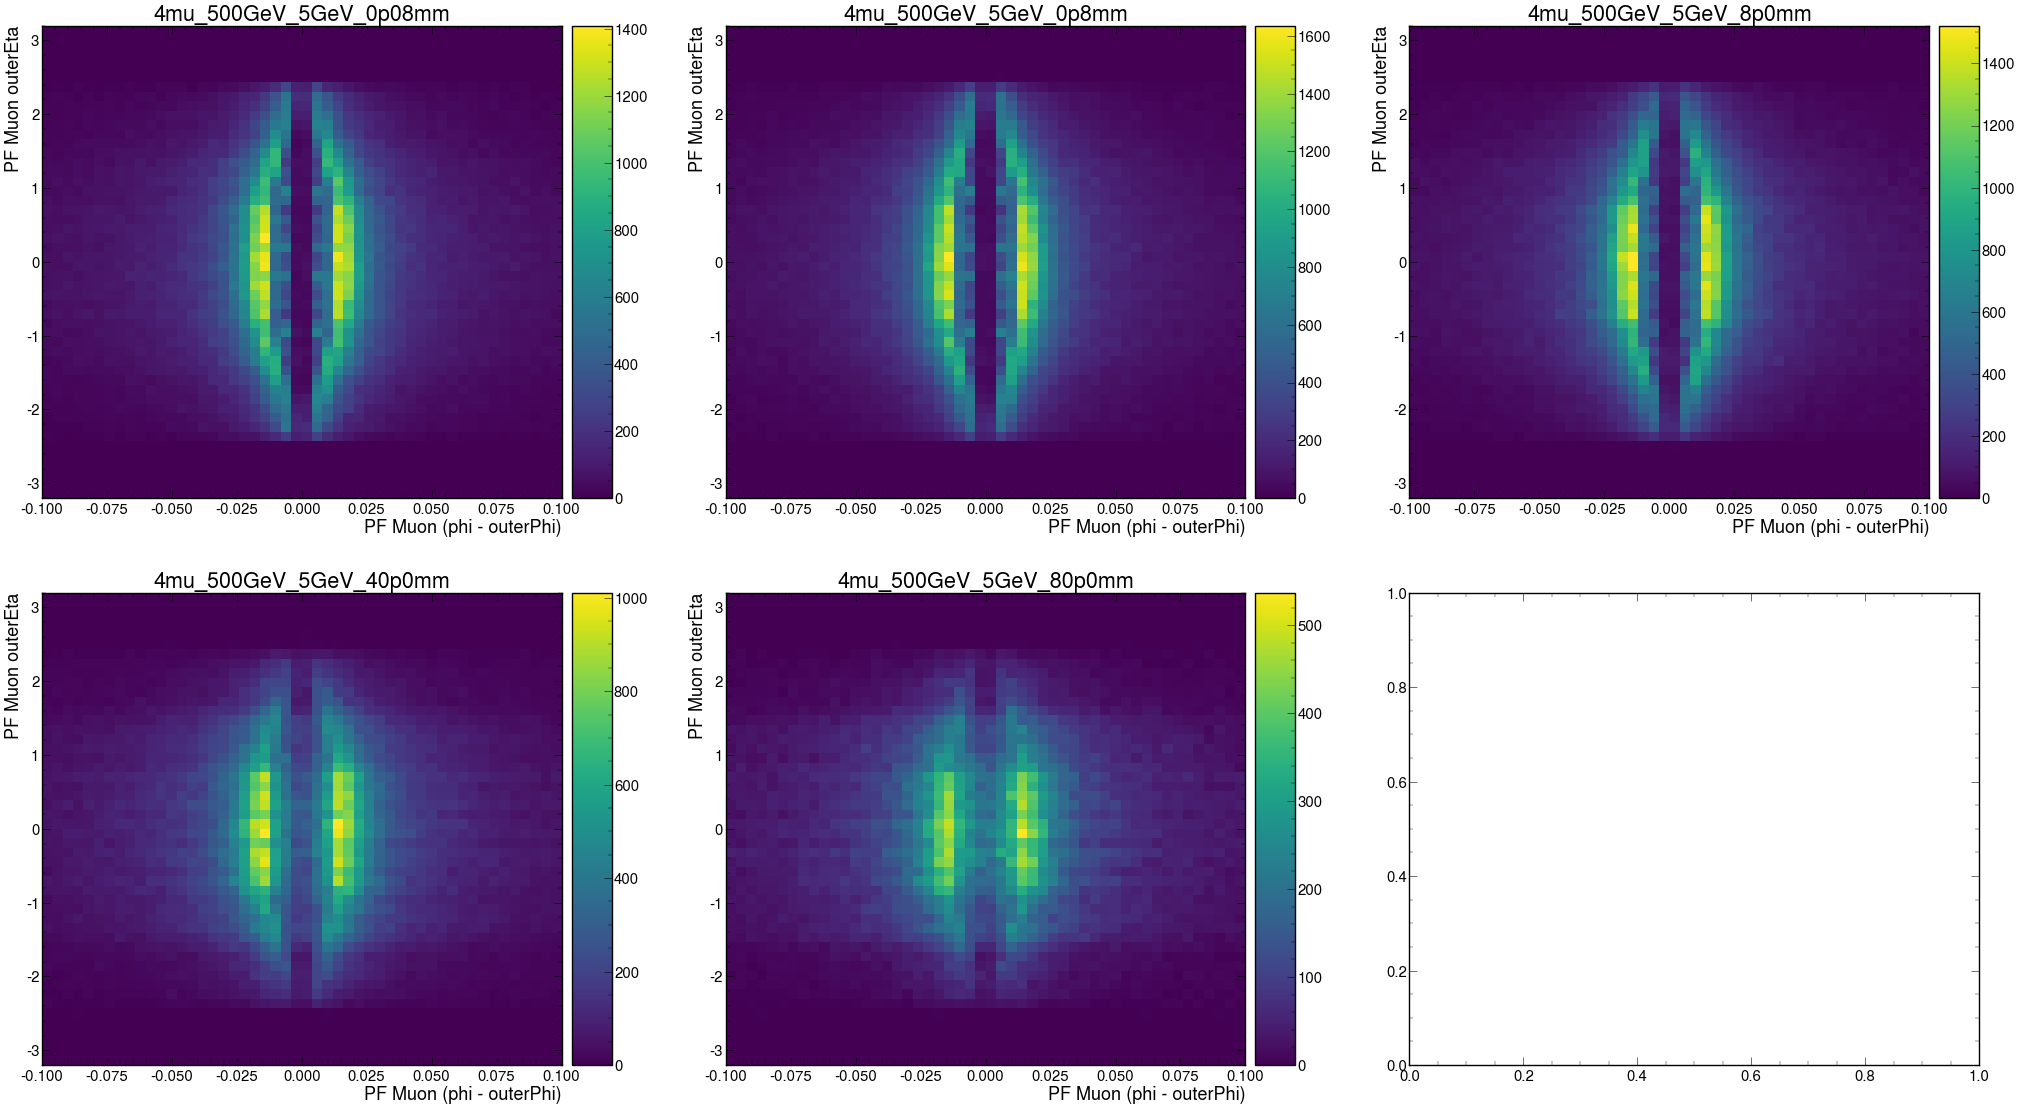

In [31]:
fig, axs = plt.subplots(2, 3, figsize=(50, 27))

hep.hist2dplot(h1, ax=axs[0][0])
plt.title('4mu_500GeV_5GeV_0p08mm')
hep.hist2dplot(h2, ax=axs[0][1])
plt.title('4mu_500GeV_5GeV_0p8mm')
hep.hist2dplot(h3, ax=axs[0][2])
plt.title('4mu_500GeV_5GeV_8p0mm')
hep.hist2dplot(h4, ax=axs[1][0])
plt.title('4mu_500GeV_5GeV_40p0mm')
hep.hist2dplot(h5, ax=axs[1][1])
plt.title('4mu_500GeV_5GeV_80p0mm')

plt.show()